# <font color='green'>Data Engineering Zoom Camp - Detailed Week 4 Notes</font>

## <font color='green'>Table of Contents</font>

<a href='#the_destination_1'>1) Data Modeling</a> \
<a href='#the_destination_2'>2) Data Warehousing Approaches</a> \
<a href='#the_destination_3'>3) Dimensional Modeling (Kimball's approach)</a> \
<a href='#the_destination_4'>4) dbt</a> \
<a href='#the_destination_5'>5) Developing with dbt</a> \
<a href='#the_destination_6'>6) Testing and Documenting dbt models</a> \
<a href='#the_destination_7'>7) Deployment of a dbt project</a> \
<a href='#the_destination_8'>8) Data Visualization</a> \
<a href='#the_destination_9'>9) References</a>

# <font color='green'><a id='the_destination_1'>1) Data Modeling</a></font>

Data modeling is the process of creating a visual representation or a blueprint that defines the information collection and management systems of any organization. This blueprint or data model helps different stakeholders, like data analysts, scientists, and engineers, to create a unified view of the organization’s data. The model outlines what data the business collects, the relationship between different datasets, and the methods that will be used to store and analyze the data.

### <font color='green'>Types of Data Models</font>

Data modeling typically begins by representing the data conceptually and then representing it again in the context of the chosen technologies. Analysts and stakeholders create several different types of data models during the data design stage. The following are three main types of data models:

<b>1) Conceptual Data Model</b>

Conceptual data models give a big picture view of data. They explain the following:

- What data the system contains
- Data attributes and conditions or constraints on the data
- What business rules the data relates to
- How the data is best organized
- Security and data integrity requirements

The business stakeholders and analysts typically create the conceptual model. It is a simple diagrammatic representation that does not follow formal data modeling rules. What matters is that it helps both technical and nontechnical stakeholders to share a common vision and agree on the purpose, scope, and design of their data project.

<b>Example of conceptual data models</b>

For example, the conceptual data model for an auto dealership might show the data entities like this:

- A Showrooms entity that represents information about the different outlets the dealership has
- A Cars entity that represents the several cars the dealership currently stocks
- A Customers entity that represents all the customers who have made a purchase in the dealership
- A Sales entity that represents the information about the actual sale
- A Salesperson entity that represents the information about all the salespeople who work for the dealership

This conceptual model would also include business requirements, such as the following:

- Every car must belong to a specific showroom.
- Every sale must have at least one salesperson and one customer associated with it.
- Every car must have a brand name and product number.
- Every customer must provide their phone number and email address.

Conceptual models thus act as a bridge between the business rules and the underlying physical database management system (DBMS). Conceptual data models are also called domain models.

<b>2) Logical data model</b>

Logical data models map the conceptual data classes to technical data structures. They give more details about the data concepts and complex data relationships that were identified in the conceptual data model, such as these:

- Data types of the various attributes (for example, string or number)
- Relationships between the data entities
- Primary attributes or key fields in the data

Data architects and analysts work together to create the logical model. They follow one of several formal data modeling systems to create the representation. Sometimes agile teams might choose to skip this step and move from conceptual to physical models directly. However, these models are useful for designing large databases, called data warehouses, and for designing automatic reporting systems.

<b>Example of logical data models</b>

In our auto dealership example, the logical data model would expand the conceptual model and take a deeper look at the data classes as follows:

- The Showrooms entity has fields such as name and location as text data and a phone number as numerical data.
- The Customers entity has a field email address with the format xxx@example.com or xxx@example.com.yy. The field name can be no more than 100 characters long.
- The Sales entity has a customer’s name and a salesperson’s name as fields, along with the date of sale as a date data type and the amount as a decimal data type.

Logical models thus act as a bridge between the conceptual data model and the underlying technology and database language that developers use to create the database. However, they are technology agnostic, and you can implement them in any database language. Data engineers and stakeholders typically make technology decisions after they have created a logical data model.

<b>3) Physical data model</b>

Physical data models map the logical data models to a specific DBMS technology and use the software’s terminology. For example, they give details about the following:

- Data field types as represented in the DBMS
- Data relationships as represented in the DBMS
- Additional details, such as performance tuning

Data engineers create the physical model before final design implementation. They also follow formal data modeling techniques to make sure that they have covered all aspects of the design.

<b>Example of physical data models</b>

Suppose that the auto dealership decided to create a data archive in Amazon S3 Glacier Flexible Retrieval. Their physical data model describes the following specifications:

- In Sales, the sale amount is a float data type, and the date of sale is a timestamp data type.
- In Customers, the customer name is a string data type.
- In S3 Glacier Flexible Retrieval terminology, a vault is the geographical location of your data. 

Your physical data model also includes additional details such as which AWS Region you will create your vault in. The physical data model thus acts as a bridge between the logical data model and the final technology implementation.

### <font color='green'>Types of Data Modeling Techniques</font>

Data modeling techniques are the different methods that you can use to create different data models. The approaches have evolved over time as the result of innovations in database concepts and data governance. The following are the main types of data modeling:

<b>Hierarchical data modeling</b>

In hierarchical data modeling, you can represent the relationships between the various data elements in a tree-like format. Hierarchical data models represent one-to-many relationships, with parents or root data classes mapping to several children.

In the auto dealership example, the parent class Showrooms would have both entities Cars and Salespeople as children because one showroom has several cars and salespeople working in it.

<b>Graph data modeling</b>

Hierarchical data modeling has evolved over time into graph data modeling. Graph data models represent data relationships that treat entities equally. Entities can link to each other in one-to-many or many-to-many relationships without any concept of parent or child.

For example, one showroom can have several salespeople, and one salesperson can also work at several showrooms if their shifts vary by location.

<b>Relational data modeling</b>

Relational data modeling is a popular modeling approach that visualizes data classes as tables. Different data tables join or link together by using keys that represent the real-world entity relationship. You can use relational database technology to store structured data, and a relational data model is a useful method to represent your relational database structure.

For example, the auto dealership would have relational data models that represent the Salespeople table and Cars table, as shown here:


Salesperson_ID	Name               
1	Jane \
2	John 


Car_ID	Car_Brand \
C1	XYZ \
C2	ABC

Salesperson ID and Car ID are primary keys that uniquely identify individual real-world entities. In the showroom table, these primary keys act as foreign keys that link the data segments.


Showroom_ID	Showroom_name	Salesperson_ID	Car_ID          
S1	NY_Showroom 1	C1
 

In relational databases, the primary and foreign keys work together to show the data relationship. The preceding table demonstrates that showrooms can have salespeople and cars.

<b>Entity-relationship data modeling</b>

Entity-relationship (ER) data modeling uses formal diagrams to represent the relationships between entities in a database. Data architects use several ER modeling tools to represent data.

<b>Object-oriented data modeling</b>

Object-oriented programming uses data structures called objects to store data. These data objects are software abstractions of real-world entities. For example, in an object-oriented data model, the auto dealership would have data objects such as Customers with attributes like name, address, and phone number. You would store the customer data so that every real-world customer is represented as a customer data object.

Object-oriented data models overcome many of the limitations of relational data models and are popular in multimedia databases.

<b>Dimensional data modeling</b>

Modern enterprise computing uses data warehouse technology to store large quantities of data for analytics. You can use dimensional data modeling projects for high-speed data storage and retrieval from a data warehouse. Dimensional models use duplication or redundant data and prioritize performance over using less space for data storage.

For example, in dimensional data models, the auto dealership has dimensions such as Car, Showroom, and Time. The Car dimension has attributes like name and brand, but the Showroom dimension has hierarchies like state, city, street name, and showroom name.

### <font color='green'>What is the data modeling process?</font>

The data modeling process follows a sequence of steps that you must perform repetitively until you create a comprehensive data model. In any organization, various stakeholders come together to create a complete data view. Although the steps vary based on the type of data modeling, the following is a general overview.

<b>Step 1: Identify entities and their properties</b>

Identify all the entities in your data model. Each entity should be logically distinct from all other entities and can represent people, places, things, concepts, or events. Each entity is distinct because it has one or more unique properties. You can think of entities as nouns and attributes as adjectives in your data model.

<b>Step 2: Identify the relationships between entities</b>

The relationships between the different entities are at the heart of data modeling. Business rules initially define these relationships at a conceptual level. You can think of relationships as the verbs in your data model. For instance, the salesperson sells many cars, or the showroom employs many salespeople.

<b>Step 3: Identify the data modeling technique</b>

After you conceptually understand your entities and their relationships, you can determine the data modeling technique that best suits your use case. For example, you might use relational data modeling for structured data but dimensional data modeling for unstructured data.

<b>Step 4: Optimize and iterate</b>

You can optimize your data model further to suit your technology and performance requirements.

### <font color='green'>Why is data modeling important?</font>

Organizations today collect a large amount of data from many different sources. However, raw data is not enough. You need to analyze data for actionable insights that can guide you to make profitable business decisions. Accurate data analysis needs efficient data collection, storage, and processing. There are several database technologies and data processing tools, and different datasets require different tools for efficient analysis.

Data modeling gives you a chance to understand your data and make the right technology choices to store and manage this data. In the same way an architect designs a blueprint before constructing a house, business stakeholders design a data model before they engineer database solutions for their organization.

Data modeling brings the following benefits:

- <b>Improve data quality:</b> By defining data structures, relationships, and constraints in a clear and consistent way, data modeling can help improve data quality and reduce errors or inconsistencies in data
- <b>Enhance communication:</b> Data modeling provides a common language and framework for stakeholders to discuss and understand data-related concepts, which can improve communication and collaboration across different teams and departments
- <b>Support decision-making:</b> Data modeling can help facilitate analysis and decision-making by providing a structured way to understand and evaluate data relationships and dependencies
- <b>Improve data governance:</b> Data modeling can help ensure that data is managed in a consistent and standardized way, which can improve data governance and compliance with regulatory requirements

Overall, data modeling is a critical aspect of data management and is used in a wide range of industries and applications, from finance and healthcare to marketing and e-commerce. By providing a structured way to understand and manage data, data modeling can help organizations make better use of their data assets and achieve their business objectives more effectively.

# <font color='green'><a id='the_destination_2'>2) Data Warehousing Approaches</a></font>

While there is overlap between data modeling and data warehousing, they are not exactly subsets of each other.

Data modeling is a broader concept that encompasses the entire process of designing a conceptual or logical representation of data, which can be used for a variety of purposes such as database design, application development, and business intelligence. Data modeling involves creating a schema that defines the structure of the data, as well as the relationships, constraints, and rules that govern the data.

Data warehousing, on the other hand, is a specific application of data modeling that is optimized for querying and reporting on large volumes of data. Data warehousing typically involves (though not always the case) designing a schema that is organized into fact tables and dimension tables, which are used to store and analyze the data. Data warehousing also involves a range of other processes, such as data integration, data transformation, and data visualization.

Inmon, Kimball and Data Vault are three popular data warehousing approaches. Here is a detailed primer on each:

### <font color='green'>2.1 Inmon's approach</font>

The Inmon methodology, also known as normalized modeling, is a data modeling approach that focuses on designing a normalized data model that is optimized for transaction processing. The methodology was developed by Bill Inmon and emphasizes the importance of designing a logical data model that is based on a normalized data structure. Inmon's approach to data warehousing is based on the concept of building a centralized enterprise data warehouse (EDW) that serves as the single source of truth for all data within an organization. Inmon's approach is sometimes referred to as the top-down approach to data warehousing because it starts with the high-level business requirements and then proceeds to build a detailed data model that supports those requirements.

Inmon's approach to data modeling is focused on creating a normalized data model that separates the data into subject areas, resulting in a centralized data warehouse. The approach emphasizes the use of data normalization techniques to reduce redundancy and ensure data integrity. The data is structured in layers, with the data marts built on top of the data warehouse. The design process of the Inmon approach is based on top-down methodology, where the data is integrated and transformed into a normalized data model. This allows for more efficient and effective data processing, as well as easier maintenance and scalability of the data model.

The Inmon methodology also emphasizes the importance of data integration, which involves bringing together data from multiple sources into a single data warehouse. The data integration process involves a range of techniques, including data extraction, data transformation, and data loading.

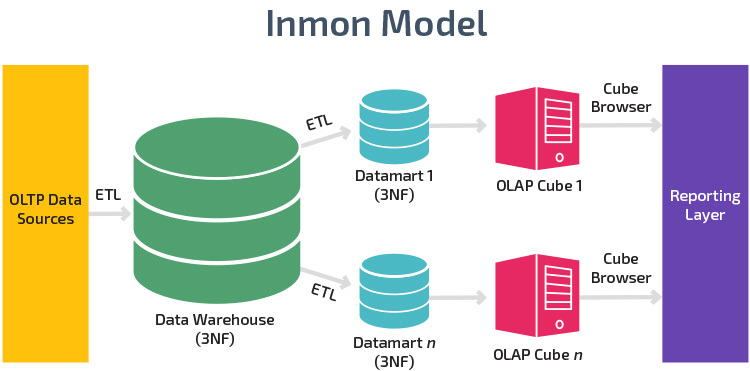

Image - https://panoply.io/data-warehouse-guide/data-mart-vs-data-warehouse/

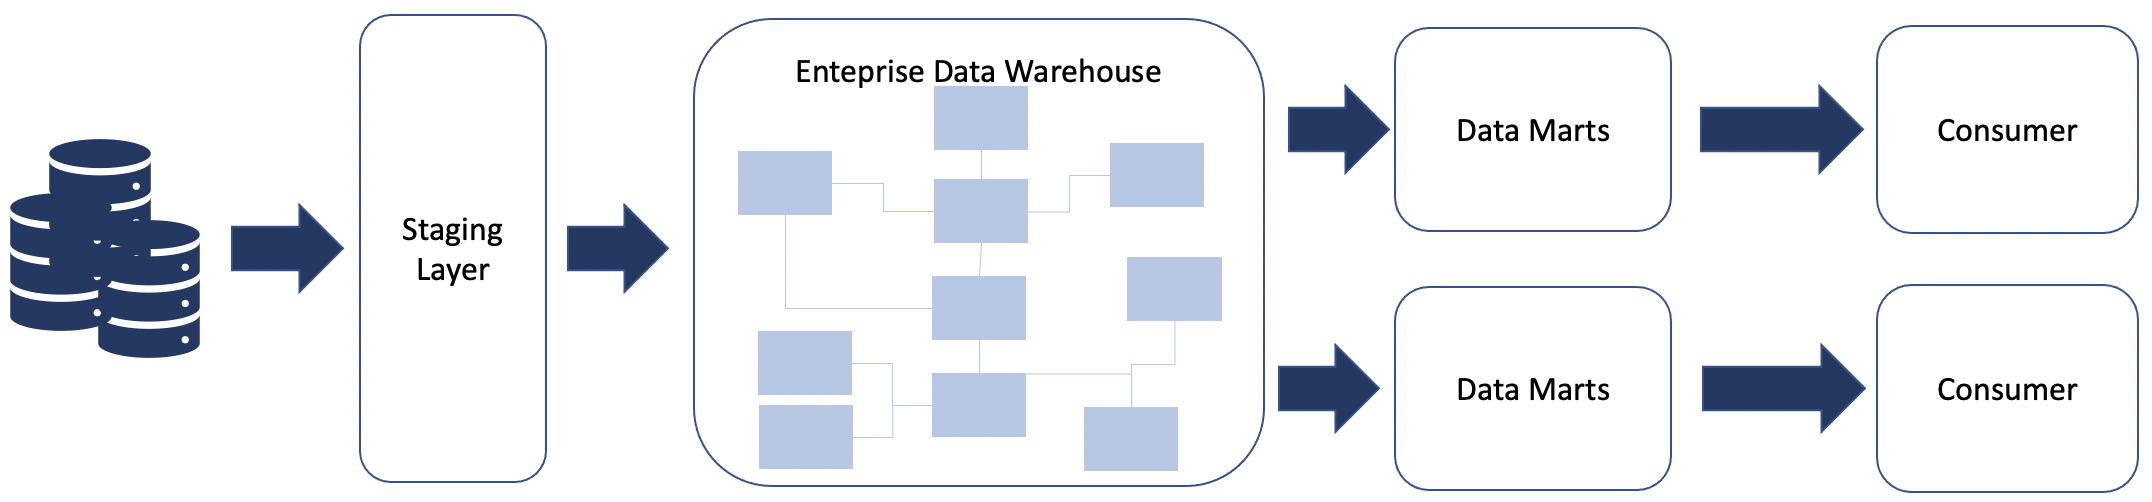

Image - https://docs.aws.amazon.com/whitepapers/latest/modern-data-architecture-rationales-on-aws/modern-data-architecture-rationales-on-aws.html

<b>Advantages</b>

- A centralized data warehouse provides a single source of truth for all data within the organization, which can help to reduce data inconsistencies and improve data quality
- The detailed data model that is built as part of the Inmon approach can help to ensure that the data warehouse meets the business requirements of the organization
- Because the data model is designed to be flexible and scalable, it can accommodate changes in the organization's business requirements over time
- The Inmon approach emphasizes the importance of data governance, which can help to ensure that the data warehouse is managed and used in a consistent and compliant manner

<b>Disadvantages</b>

- The centralized nature of the Inmon approach can make it difficult to scale the data warehouse to support larger volumes of data or more complex data processing requirements
- Because the Inmon approach requires a detailed data model to be developed upfront, it can be time-consuming and expensive to implement
- The Inmon approach can be less flexible than other data warehousing approaches, as changes to the data model may require significant changes to the overall data warehouse architecture
- Because the Inmon approach relies heavily on data governance, it can be challenging to implement in organizations that do not have a strong culture of data governance


### <font color='green'>2.2 Kimball's approach</font>

The Kimball methodology, also known as dimensional modeling, is a data modeling approach that focuses on designing data warehouses to support efficient querying and analysis of data for business intelligence purposes. The methodology was developed by Ralph Kimball and emphasizes the importance of designing a dimensional data model that is optimized for OLAP (Online Analytical Processing) applications.

Kimball's approach to data modeling emphasizes on the creation of a dimensional model for the data warehouse. It involves designing a star schema or a snowflake schema that organizes data into fact tables and dimension tables, where the fact tables contain the business measures, and the dimension tables provide context to those measures. The structure is denormalized, which makes it easy to query, with faster query response times. The design process of the Kimball approach is based on bottom-up methodology, where the data is organized and integrated into a dimensional model.

The Kimball methodology emphasizes the importance of business requirements and user needs in the data modeling process. It also focuses on iterative development and the use of agile methodologies to deliver value quickly to the organization.

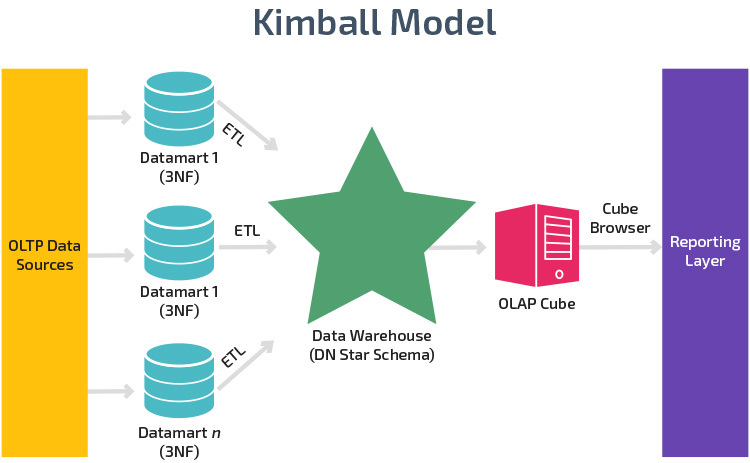

Image - https://panoply.io/data-warehouse-guide/data-mart-vs-data-warehouse/


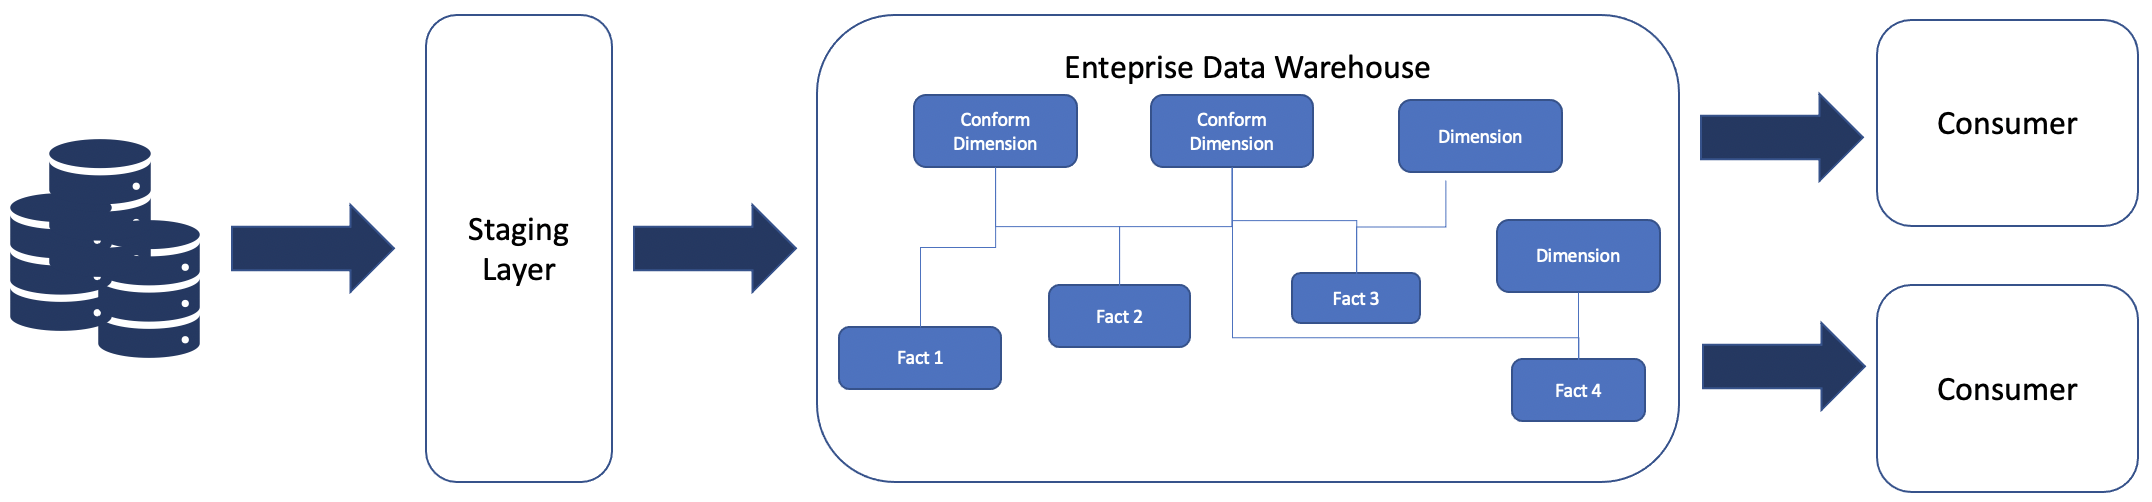

Image - https://docs.aws.amazon.com/whitepapers/latest/modern-data-architecture-rationales-on-aws/modern-data-architecture-rationales-on-aws.html

<b>Advantages</b>

- Optimized for analysis: Kimball's approach is designed to optimize data for analysis and querying. By organizing data into fact and dimension tables, queries can be optimized for fast retrieval and aggregation of data

- Flexibility: The dimensional model is flexible and can be easily modified to accommodate changes in business requirements

- Easier to understand: The dimensional model is easier to understand for business users because it is organized around business events and dimensions that are familiar to them

<b>Disadvantages</b>

- Limited integration: Kimball's approach is less suited for integrating data from multiple sources. Since data is organized around business events, it can be difficult to integrate data that does not fit neatly into the model

- Redundancy: The dimensional model can lead to redundancy, as dimension tables may contain duplicate data

<b>NOTE:</b>

In Kimball's approach, data marts are used to build the data warehouse incrementally by integrating the dimensional data marts into the overall architecture. On the other hand, in Inmon's approach, data marts are typically built on top of the enterprise data warehouse to serve specific business functions and to provide data to downstream applications.


### <font color='green'>2.3 Data Vault</font>

The Data Vault methodology, also known as Vault modeling, is a data modeling approach that focuses on designing a flexible and scalable data model that can accommodate changes in the data over time. The methodology was developed by Dan Linstedt and emphasizes the importance of designing a data model that can support the entire data lifecycle, from data collection to analysis and reporting.

The Data Vault approach is based on the concept of a hub-and-spoke model, with a central hub table that contains unique records for each business entity, connected to satellite tables that hold additional data for the entity. The approach emphasizes the use of a normalized data model, with a focus on data traceability and data governance. The data is structured in three types of tables: Hubs, Links, and Satellites. The Hubs contain unique business keys, Links contain the relationships between Hubs, and Satellites contain the attributes of the Hubs and Links. The design process of the Data Vault approach is based on a hybrid methodology, with elements of both top-down and bottom-up design.

The Vault methodology emphasizes the importance of data traceability and auditability, as well as the ability to handle changes in the data over time. It also emphasizes the importance of using automation and metadata to manage the data modeling process, and the use of agile methodologies to deliver value quickly to the organization.

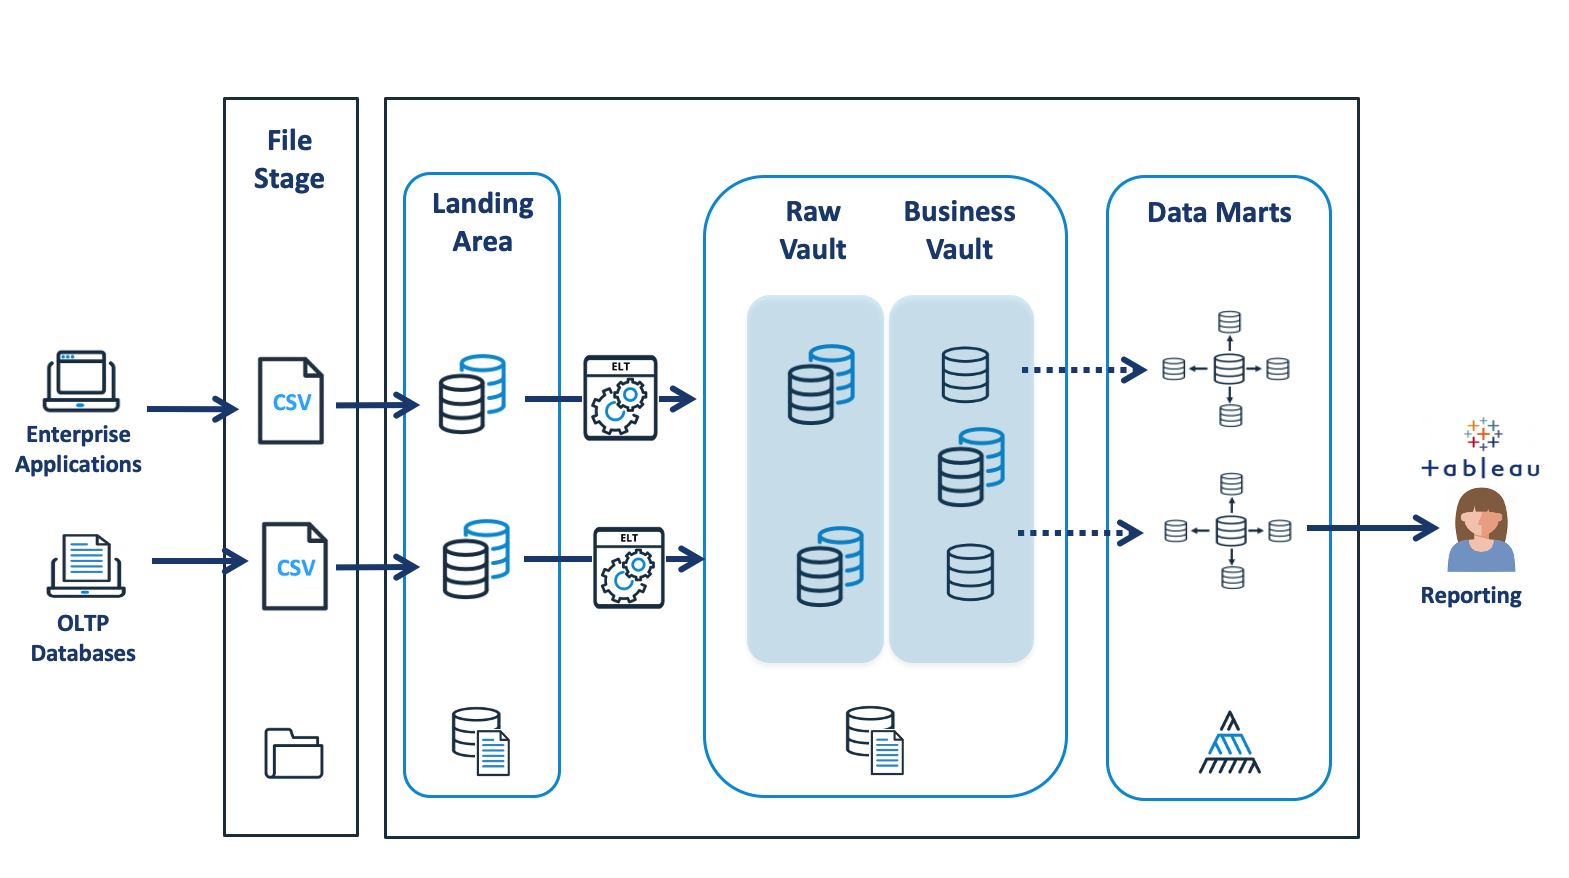

Image - https://www.analytics.today/blog/when-should-i-use-data-vault

<b>Advantages</b>

- Scalability: The Data Vault approach allows for easy expansion as new data sources are added to the system. This is achieved by using a standardized modeling technique and separating the data into distinct layers that can be easily extended.
- Flexibility: The Data Vault approach is designed to accommodate changing business requirements, as it separates the data into distinct layers and allows for easy modification of the data model.
- Historical tracking: The Data Vault approach emphasizes the importance of historical tracking and auditability, which is achieved through the use of satellite tables and link tables that allow for easy tracking of changes over time.
- Data quality: The Data Vault approach emphasizes data quality by using a standardized modeling technique and a rigorous ETL process that includes data cleansing and transformation.

<b>Disadvantages</b>

- Complexity: The Data Vault approach can be complex to implement and requires a significant amount of upfront planning and design.
- Performance: The Data Vault approach can result in slower performance compared to other modeling approaches, as it requires more tables and joins to retrieve data.
- Data redundancy: The Data Vault approach can result in data redundancy, as the same data may be stored in multiple tables to support historical tracking and auditability.

### <font color='green'>Which one should I use?</font>

The choice of modeling approach depends on the specific requirements and characteristics of the data warehousing project. Here are some general guidelines:

- Kimball's approach is well-suited for projects with relatively simple requirements and where the focus is on building a dimensional model for reporting and analysis purposes. This approach is also suitable when the focus is on creating a specific set of reports or analytics.

- Inmon's approach is well-suited for projects with more complex requirements and where the focus is on creating a comprehensive enterprise data warehouse that can support multiple reporting and analytical needs. This approach is also suitable when the focus is on data integration and consolidation across the organization.

- Data Vault approach is well-suited for large-scale data warehousing projects that require flexibility, scalability, and historical tracking of data changes. This approach is also suitable when the focus is on compliance and auditability of data.

Ultimately, the choice of modeling approach should be based on a careful analysis of the specific requirements of the data warehousing project and the capabilities of the organization in terms of resources, skills, and technology.


# <font color='green'><a id='the_destination_3'>3) Dimensional Modeling (Kimball's approach)</a></font>


### <font color='green'>Components</font>

The architecture of dimensional modeling includes the following components:

`Fact Tables`: These are the central tables in the dimensional model that contain the measures or numeric data that are being analyzed. Fact tables are typically connected to multiple dimension tables and contain foreign keys that link to those tables.

`Dimension Tables`: These tables contain the descriptive data that provide context for the measures in the fact tables. Dimension tables are used to filter, group, and aggregate the data in the fact table. Examples of dimension tables include time, location, customer, product, and employee tables.

`Hierarchies`: These are logical structures that organize the data in the dimension tables into meaningful groups. Hierarchies can be used to drill down or roll up the data for analysis.

`Attributes`: These are the additional columns in the dimension tables that provide additional descriptive data about the dimension. Attributes can be used to filter, group, and aggregate the data in the fact table.

`ETL Processes`: These are the processes used to extract data from the source systems, transform the data into the required format, and load the data into the data warehouse. The ETL processes are critical to ensuring the quality and consistency of the data in the data warehouse.

Overall, the architecture of dimensional modeling is designed to support easy and efficient analysis of the data. By organizing the data into fact and dimension tables and providing hierarchies and attributes, dimensional modeling provides a flexible and intuitive way to explore the data and gain insights into the business.


### <font color='green'>Architecture</font>

In dimensional modeling, there are several key areas involved in the overall architecture:

`Source Systems`: These are the systems that are the source of the data that is being modeled. This can include databases, flat files, or other data sources.

`Staging Area`: This is where the data is initially loaded from the source systems. The staging area is used to clean, transform, and integrate the data from the source systems before it is loaded into the data warehouse.

`Data Warehouse`: This is the central repository for the data. The data warehouse is designed to be optimized for reporting and analysis and is usually organized around business processes or subject areas.

`Data Marts`: These are subsets of the data warehouse that are designed to support specific business functions or departments. Data marts are usually smaller and more focused than the data warehouse and are optimized for specific reporting and analysis needs.

`OLAP Cubes`: These are multi-dimensional data structures that allow users to slice and dice data along different dimensions, such as time, geography, or product.

`Business Intelligence Tools`: These are the tools that are used to analyze and report on the data in the data warehouse and data marts. Business intelligence tools include reporting tools, dashboards, and OLAP tools.

Overall, dimensional modeling is a flexible and scalable approach to data modeling that allows organizations to easily analyze and report on their data. By breaking the data down into smaller, more manageable chunks (i.e., data marts), dimensional modeling makes it easier for users to access the data they need, when they need it.

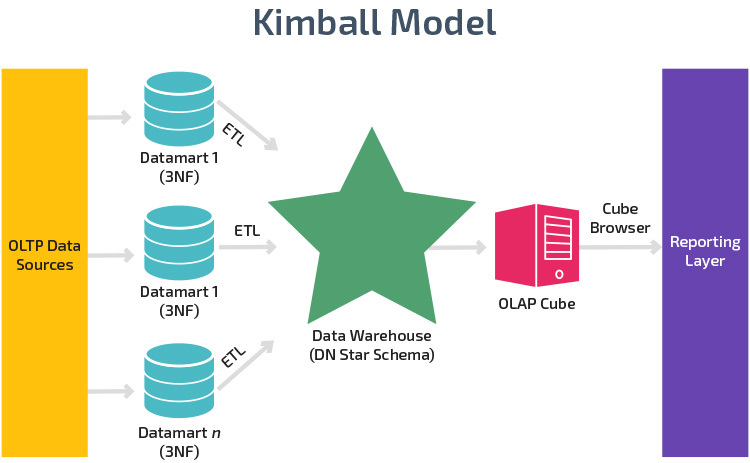

Image - https://panoply.io/data-warehouse-guide/data-mart-vs-data-warehouse/



# <font color='green'><a id='the_destination_4'>4) dbt</a></font>

## <font color='green'>What is dbt?</font>

dbt stands for "Data Build Tool" and is an open-source command-line tool that allows you to transform data in your data warehouse using SQL. It's often described as a "data modeling tool" or a "data pipeline tool". dbt is a SQL-first transformation workflow that lets teams quickly and collaboratively deploy analytics code following software engineering best practices like modularity, portability, CI/CD, and documentation. 

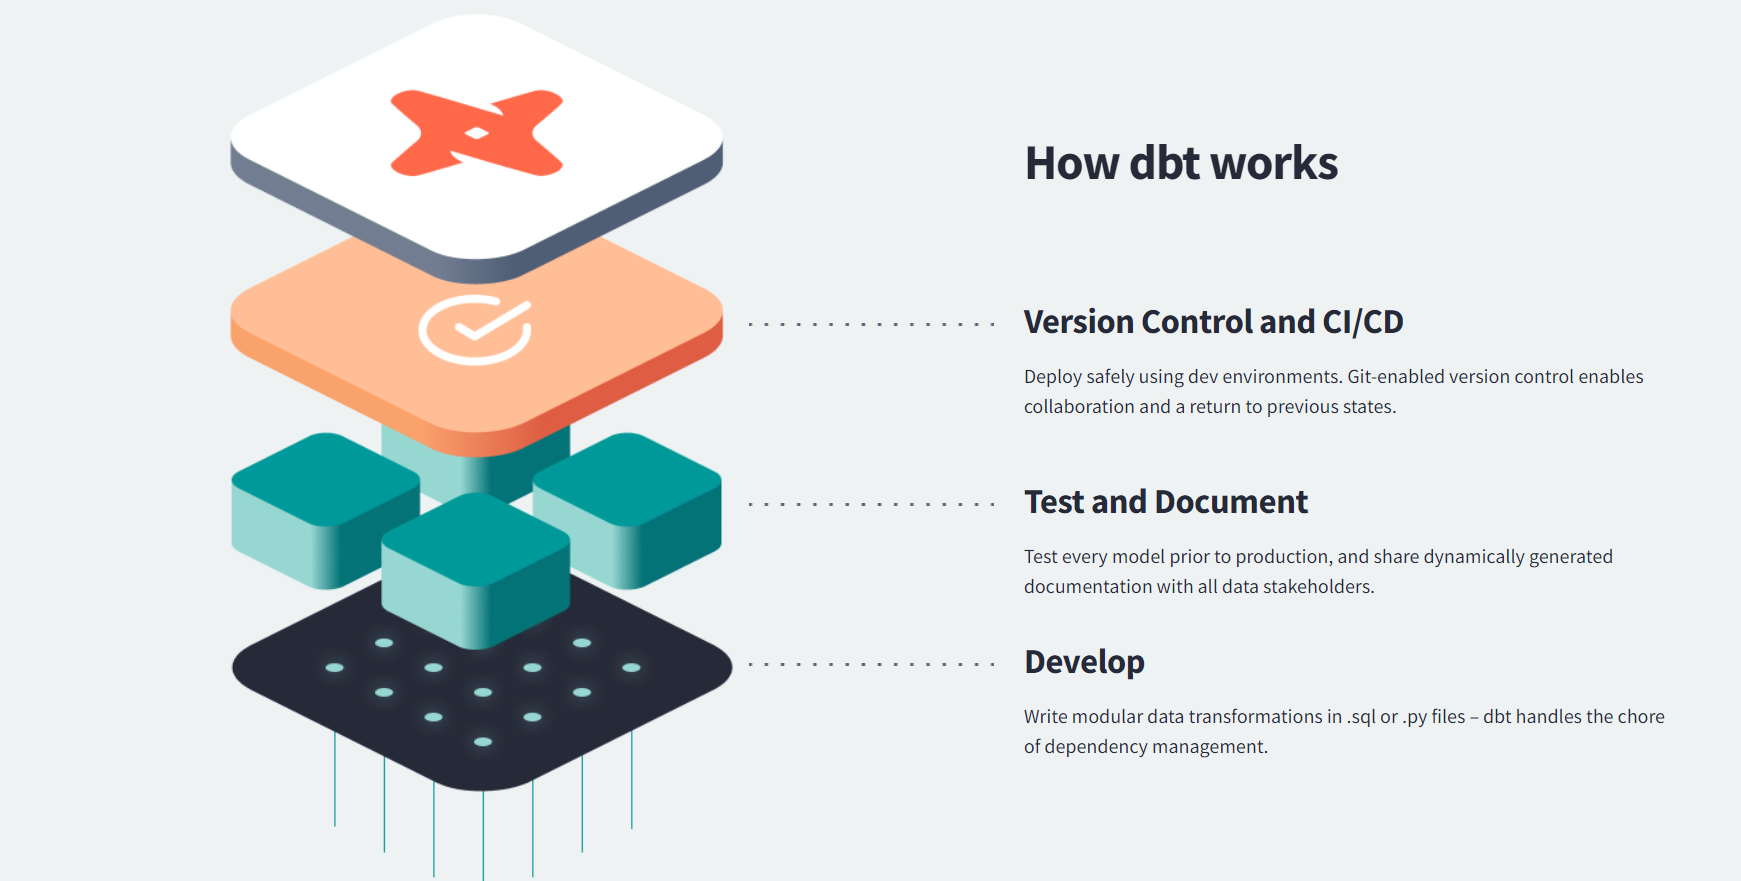


dbt (data build tool) is an open-source command-line tool for building and orchestrating data transformations in a data warehouse. dbt helps data analysts and engineers transform data in their warehouse more effectively, by providing a simple and efficient way to build data pipelines, manage data modeling, and deploy data transformations.

dbt works by defining data models in SQL files, which describe the relationships between data tables, the business logic to transform and manipulate data, and the expected output of these transformations. These SQL files are organized in a project directory structure, and can be version-controlled using git or other source control tools.

dbt provides several core features that make it easy to build, test, and deploy data transformations, including:

`Model definitions`: dbt allows users to define data models using SQL queries, making it easy to express complex relationships between data tables, and to define complex transformations on data.

`Testing`: dbt provides a powerful testing framework that enables users to test the output of data transformations against expected results, ensuring the quality and accuracy of the data.

`Documentation`: dbt provides a built-in documentation tool that generates documentation for all data models in a project, making it easy to understand the structure and relationships between data tables.

`Deployment`: dbt provides a simple and flexible way to deploy data models and transformations to a production environment, using a variety of deployment strategies such as CI/CD pipelines, manual deployment, and others.

Overall, dbt is a powerful tool for data analysts and engineers to build, test, and deploy data transformations in a data warehouse, making it easier to manage data pipelines and improve data quality and accuracy.

dbt works with a variety of data warehouses, including Snowflake, BigQuery, Redshift, and others. It can be run locally on your machine or in the cloud using a tool like Airflow or dbt Cloud.


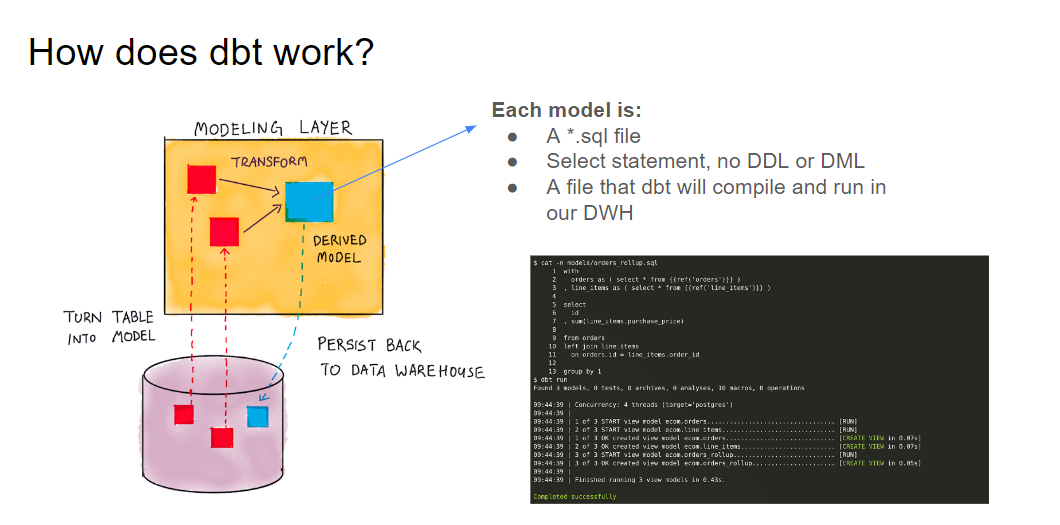

## <font color='green'>How to use dbt?</font>

There are two ways to use dbt:

`dbt Core`: This is the open-source version of dbt that you can download and run on your local machine. It allows you to build, test, and document your data pipelines, and you can integrate it with your existing development workflow using tools like Git and CI/CD pipelines.

`dbt Cloud`: This is a cloud-based version of dbt that provides a more integrated and streamlined experience for building and deploying data pipelines. It includes features like managed infrastructure, scheduling, monitoring, and collaboration tools, so you don't have to worry about setting up and maintaining your own infrastructure.

Both versions of dbt use the same SQL-based syntax and functionality, so you can write your code in either version and switch between them as needed. However, dbt Cloud provides some additional features that make it more suitable for teams and larger projects, while dbt Core gives you more control and flexibility over your development environment.

In this tutorial, we'll be using dbt Cloud. For integration with BigQuery we will use the dbt Cloud IDE, so a local installation of dbt core isn't required.


## <font color='green'>Setting up dbt</font>


<b>Prerequisites for our lesson</b>

- A running warehouse (BigQuery or postgres)
- A set of running pipelines ingesting the project dataset (week 3 completed): Datasets list
  - Yellow taxi data - Years 2019 and 2020
  - Green taxi data - Years 2019 and 2020
  - fhv data - Year 2019.

Use this code to load the data to GCS - https://github.com/Balajirvp/DE-Zoomcamp/blob/main/Week%204/web_to_gcs.py

Then use BiqQuery to create 3 empty datasets and a dataset which contains the yellow and green trips data
- dbt_balaji_padmanathan (think of this as a sandbox)
- production
- staging
- trips_data_all
  - green_trips
  - yellow_trips

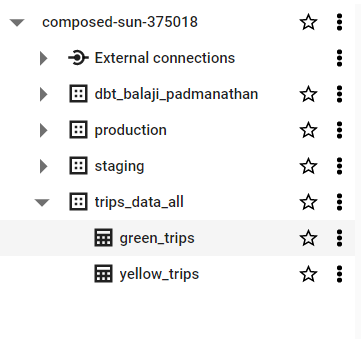

The yellow_trips and green_trips tables were created by using the taxi data we uploaded to GCS earlier. (I just loaded the 2020 data into these tables)

The following image gives an idea of what we'll be doing this week with dbt.


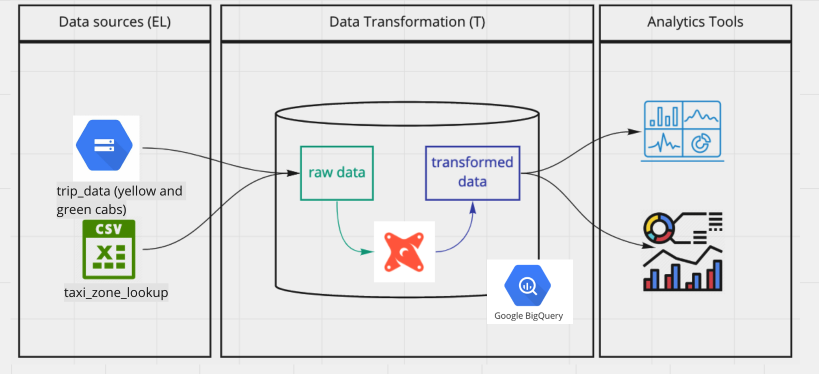

<b>Instructions</b>

You will need to create a dbt cloud account using this link - https://www.getdbt.com/signup/ \
Then Connect to your warehouse following these instructions - https://docs.getdbt.com/docs/collaborate/manage-access/set-up-bigquery-oauth \
More detailed instructions in - https://github.com/DataTalksClub/data-engineering-zoomcamp/blob/main/week_4_analytics_engineering/dbt_cloud_setup.md

Make sure that you set up a GitHub repo for your project. In Account settings > Projects you can select your project and change its settings, such as Name or dbt Project Subdirectoy, which can be convenient if your repo is previously populated and would like to keep the dbt project in a single subfolder.

# <font color='green'><a id='the_destination_5'>5) Developing with dbt</a></font>

## <font color='green'>Jinja Templating</font>

Jinja is a powerful templating engine for Python that is widely used in web development frameworks like Flask and Django. It is used to generate dynamic content by embedding Python code within text. Jinja is designed to be flexible and allows developers to customize the syntax and behavior of the templates.

Some of the key features of Jinja templating include:

`Variables`: Jinja allows you to pass variables into templates and use them to generate dynamic content. Variables are typically enclosed in double curly braces {{ }}.

`Control structures`: Jinja provides a set of control structures that allow you to iterate over lists, perform conditional logic, and more. Examples of control structures include {% if %}, {% for %}, and {% while %}.

`Macros`: Macros are reusable snippets of code that can be called from within templates. They are useful for encapsulating common functionality and reducing repetition in your templates.

`Filters`: Filters allow you to modify the output of variables in templates. For example, you can use the built-in upper filter to convert a string to uppercase.

Overall, Jinja is a powerful and flexible tool for generating dynamic content in Python applications. It has a large community of users and is well-documented, making it a popular choice for developers working on web applications.

### <font color='green'>Jinja in dbt</font>

With Jinja, you can write dynamic SQL queries and models, allowing you to perform operations such as conditional logic, loops, and string manipulations.

In dbt, you can use Jinja templating to generate SQL statements, model names, and file paths dynamically. Some common use cases for Jinja templating in dbt include:

- Creating dynamic SQL queries that reference columns, tables, or other variables
- Using control flow statements to conditionally execute SQL code
- Using loops to generate repetitive SQL code
- Creating dynamic model names based on variables
- Building dynamic file paths for data sources, models, and other files

Jinja templating is integrated into the dbt syntax and is used extensively throughout the project. You can use Jinja in dbt by enclosing your Jinja code in double curly braces ({{ }}) or curly braces with a percent sign ({% %})

Overall, Jinja templating is a powerful tool that allows you to write more dynamic and flexible code in dbt, and is a core component of the dbt framework.

## <font color='green'>Anatomy of a dbt model</font>

Here's an example dbt model:

```
{{
   config(materialized='table')
}}

SELECT *
FROM staging.source_table
WHERE record_state = 'ACTIVE' 

```
In the Jinja statement defined within the `{{ }}` block we call the config() function
  - More info about Jinja macros for dbt - https://docs.getdbt.com/docs/build/jinja-macros

We commonly use the `config()` function at the beginning of a model to define a materialization strategy: a strategy for persisting dbt models in a warehouse
   - The `table` strategy means that the model will be rebuilt as a table on each run
   - We could use a `view` strategy instead, which would rebuild the model on each run as a SQL view
   - The `incremental` strategy is essentially a table strategy but it allows us to add or update records incrementally rather than rebuilding the complete table on each run
   - The `ephemeral` strategy creates a Common Table Expression (CTE)
   - You can learn more about materialization strategies with dbt here - https://docs.getdbt.com/docs/build/materializations
   - Besides the 4 common `table, view, incremental and ephemeral` strategies, custom strategies can be defined for advanced cases


dbt will compile the code into the following SQL query:

```
CREATE TABLE my_schema.my_model AS (
    SELECT *
    FROM staging.source_table
    WHERE record_state = 'ACTIVE'
)
```

After the code is compiled, dbt will run the compiled code in the Data Warehouse.

Additional model properties are stored in YAML files. Traditionally, these files were named `schema.yml` but later versions of dbt do not enforce this as it could lead to confusion.

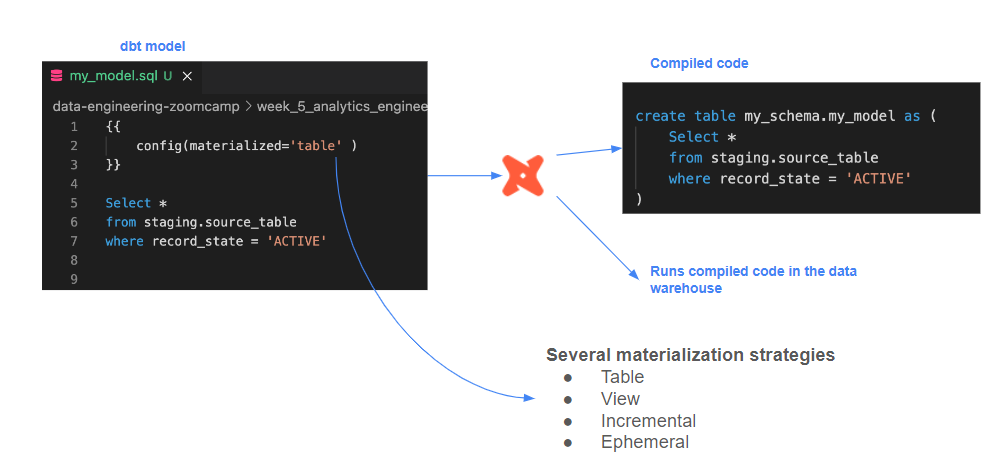


## <font color='green'>The FROM Clause</font>

The FROM clause within a SELECT statement defines the sources of the data to be used.

The following are available to dbt models:

### <font color='green'>Sources</font>

Use the data loaded within our Data Warehouse.

- We can access this data with the `source()` function.
- The `sources` key in our YAML file contains the details of the databases that the `source()` function can access and translate into proper SQL-valid names.
- Additionally, we can define "source freshness" to each source so that we can check whether a source is "fresh" or "stale", which can be useful to check whether our data pipelines are working properly.

This link has all the relevant details - https://docs.getdbt.com/docs/build/sources


<b>Example</b>

In a DBT project, the `schema.yml` file is used to define the sources, which are the raw data that we want to transform into our final models. Let's say we have a BigQuery database with two tables, `my_table1` and `my_table2`, and we want to use DBT to transform this data into a set of analytics tables.

We would start by creating a DBT project and setting up a connection to our BigQuery database. Then, we would create a `schema.yml` file in our project's models directory with the following contents:

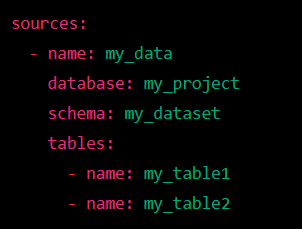

Here, we're defining a single source which contains 2 tables. It has a `name`, which is the name that we'll use to reference this source in our DBT models. The name field serves as an alias or nickname for the source. It allows you to refer to the source in dbt code using the `ref()` function instead of specifying the full name of the source. This can make your code more concise and easier to read.

The `database` field specifies the name of the BigQuery database (project name) where the source tables are located. In this example, the database is `my_project`.

The `schema` field specifies the name of the dataset where the source tables are located. In this example, the orders table is in the `my_dataset` dataset.

The `tables` field specifies the name of the table or tables that we want to use as the source for our DBT models. In this example, we have 2 tables - `my_table1` and `my_table2`

Once we have our sources defined in the `schema.yml` file, we can create DBT models that reference these sources and transform the raw data into the analytics tables that we need.

There are multiple ways in which we can reference our source in the FROM clause:

`FROM {{ ref('my_data', 'my_table1') }}`

`FROM {{ source('my_data', 'my_table1') }}`

`FROM {{ source('my_project', 'my_dataset', 'my_table1') }}`

As mentioned earlier, the source name makes our code cleaner to read when we use it inside `ref()`


### <font color='green'>Seeds</font>

CSV files which can be stored in our repo under the seeds folder.

- Seeds are best suited to static data which changes infrequently
- Seed usage:
  - Add a CSV file to your seeds folder
  - Run the `dbt seed` command to create a table in our Data Warehouse
  - If you update the content of a seed, running dbt seed will append the updated values to the table rather than substituting them
  - Running dbt seed --full-refresh instead will drop the old table and create a new one
- Refer to the seed in your model with the ref() function


This link has all the relevant details - https://docs.getdbt.com/docs/build/seeds


<b>Example</b>

Let's assume you've got a `taxi_zone_lookup.csv` file in your seeds folder which contains locationid, borough, zone and service_zone:

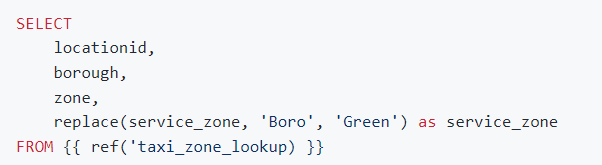

The `ref()` function references underlying tables and views in the Data Warehouse. When compiled, it will automatically build the dependencies and resolve the correct schema fo us. So, if BigQuery contains a schema/dataset called dbt_dev inside the my_project database which we're using for development and it contains a table called stg_green_tripdata, then the following code...

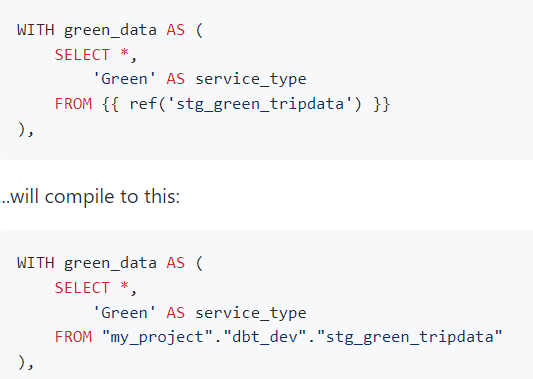

- The ref() function translates our references table into the full reference, using the database.schema.table structure
- If we were to run this code in our production environment, dbt would automatically resolve the reference to make it point to our production schema


## <font color='green'>Defining a Source and Creating a Model</font>

We will now create our first model.

We will begin by creating 2 new folders under our `models` folder:

- `staging` will have the raw models
- `core` will have the models that we will expose at the end to the BI tool, stakeholders, etc.

Under staging we will add 2 new files: `stg_green_tripdata.sql` and `schema.yml`:

- We define our sources in the schema.yml model properties file
- We are defining the 2 tables for yellow and green taxi data as our sources

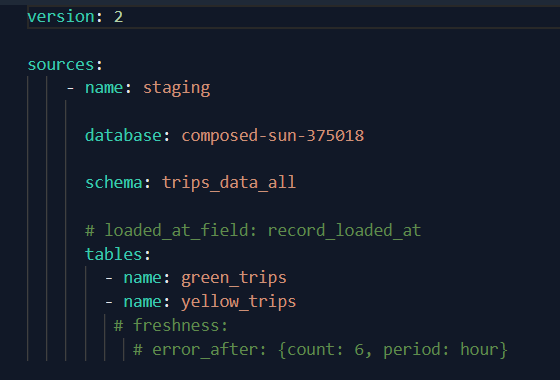

- The below query will create a view in the sandbox dataset/schema (dbt_balaji_padmanathan in my case) in our database
- We make use of the `source()` function to access the green taxi data table, which is defined inside the `schema.yml` file

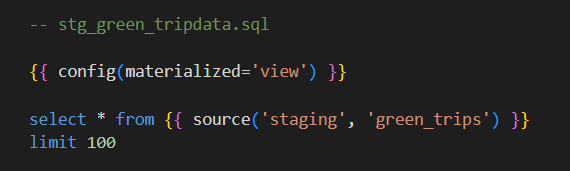

The advantage of having the properties in a separate file is that we can easily modify the `schema.yml` file to change the database details and write to different databases without having to modify our `stg_green_tripdata.sql` file.

You may now run the model with the `dbt run` command, either locally or from dbt Cloud.

### <font color='green'>Macros</font>

Macros are pieces of code in Jinja that can be reused, similar to functions in other languages.

dbt already includes a series of macros like `config()`, `source()` and `ref()`, but custom macros can also be defined.

Macros allow us to add features to SQL that aren't otherwise available, such as:

- Use control structures such as `if` statements or `for` loops
- Use environment variables in our dbt project for production
- Operate on the results of one query to generate another query
- Abstract snippets of SQL into reusable macros

Macros are defined in separate `.sql` files which are typically stored in a `macros` directory.

There are 3 kinds of Jinja delimiters:

- `{% ... %}` for statements (control blocks, macro definitions)
- `{{ ... }}` for expressions (literals, math, comparisons, logic, macro calls...)
- `{# ... #}` for comments

<b>Example</b>

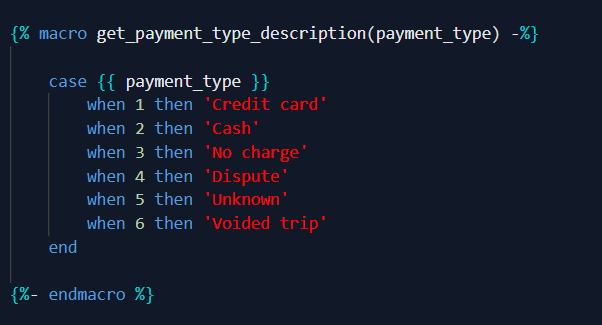

- The `macro` keyword states that the line is a macro definition. It includes the name of the macro as well as the parameters
- The code of the macro itself goes between 2 statement delimiters. The second statement delimiter contains an `endmacro` keyword
- In the code, we can access the macro parameters using expression delimiters
- The macro returns the code we've defined rather than a specific value

### <font color='green'>Packages</font>

Macros can be exported from packages, similar to how classes and functions can be exported from libraries in other languages. Packages contain standalone dbt projects with models and macros that tackle a specific problem area.

When you add a package to your project, the package's models and macros become part of your own project. A list of useful packages can be found in the dbt package hub.

To use a package, you must first create a `packages.yml` file in the root of your work directory. Here's an example:

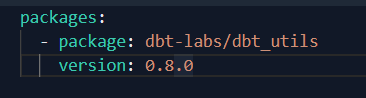

After declaring your packages, you need to install them by running the `dbt deps` command either locally or on dbt Cloud.

You may access macros inside a package in a similar way to how Python access class methods:

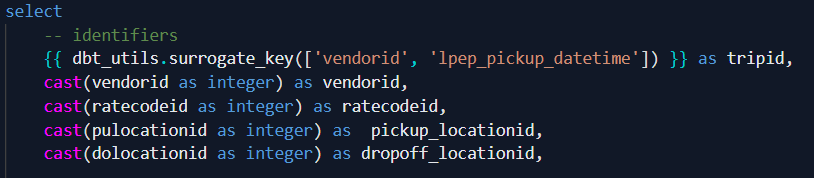

The `surrogate_key()` macro generates a hashed surrogate key with the specified fields in the arguments.

### <font color='green'>Variables</font>

Like most other programming languages, variables can be defined and used across our project.

Variables can be defined in multiple ways:

- Defining variables in the `dbt_project.yml` file under the vars key. These variables can then be referenced in other configuration files using {{ var('variable_name') }} syntax

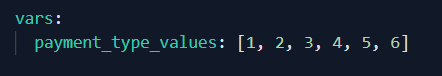

- Defining variables in a YAML file and referencing it in the dbt_project.yml file using the vars key

- Defining variables in a SQL query using the set command. These variables can then be used within the same query using {{ var('variable_name') }} syntax

- Defining variables in a vars YAML file and passing it to dbt using the --var flag when running a command. For example, dbt run --var '{"variable_name": "variable_value"}'

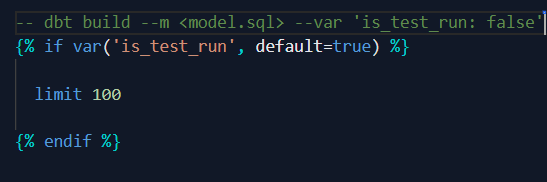

- Defining variables using environment variables. dbt allows you to reference environment variables in configuration files using {{ env('ENV_VAR_NAME') }} syntax

Note that the scope of the variable will depend on where it is defined. For example, a variable defined in the dbt_project.yml file will be available to all models and macros, whereas a variable defined in a SQL query will only be available within that query.

Run the `dbt run` code for both yellow and green trip data and create the views in BQ.

## <font color='green'>Referencing the models created so far in a new model</font>

The models we've created in the staging area are for normalizing the fields of both green and yellow taxis. With normalized field names we can now join the 2 together in more complex ways.

As mentioned earlier, `ref()` macro is used for referencing any underlying tables and views that we've created, so we can reference seeds as well as models using this macro:

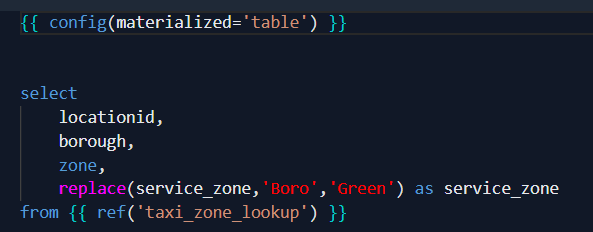

This model references the taxi_zone_lookup table created from the taxi zone lookup CSV file which is kept in the seeds folder.

We now made use of the 2 earlier models and this dim_zones model to create a brand new model named `fact_trips.sql` which can be found in the 'core' folder of the `models` - https://github.com/Balajirvp/DE-Zoomcamp/blob/dbt_tutorial/Week%204/dbt_files/models/core/fact_trips.sql

This is how the lineage looks like -

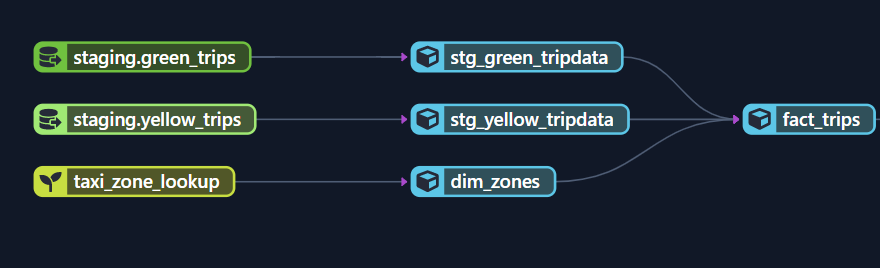


This is how it looks like in BQ -

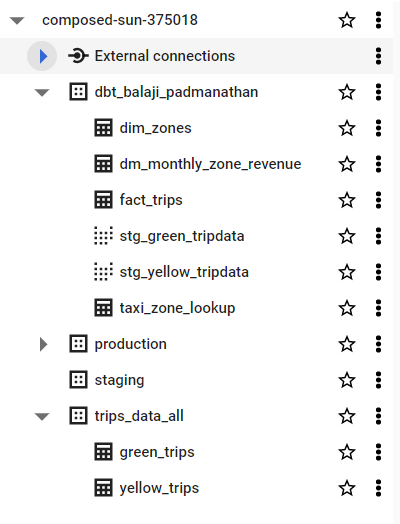

<b>NOTE:</b> 

- Running `dbt run` will run all models but NOT the seeds. The `dbt build` can be used instead to run all seeds and models as well as tests, which we will cover next
- Additionally, running `dbt run --select my_model` will only run the model itself, but running `dbt run --select +my_model` will run the model as well as all of its dependencies
- In dbt, the name of the model (For example, in our case, stg_yellow_tripdata) corresponds to the name of the table or view that is created in the database


# <font color='green'><a id='the_destination_6'>6) Testing and Documenting dbt models</a></font>


## <font color='green'>Testing</font>

In dbt, testing refers to the process of validating data to ensure it meets expected standards. dbt provides a comprehensive testing framework that allows users to test data in various ways. Here's how testing works in dbt:

- `Defining tests`: Dbt tests are defined as individual models in the project. These models are placed in a separate directory named tests in the project, and the naming convention for these models is <model_name>_test.

- `Writing assertions`: In dbt, assertions are used to validate data. Assertions are SQL queries that return a single row with a single column that represents the result of the test. The result can be a boolean or a numeric value. Assertions can be written in the model file or in a separate file named schema.yml.

- `Running tests`: Once the assertions are written, they can be run using the `dbt test` command. This command will run all the tests in the project, or specific tests based on arguments passed to the command.

- `Viewing test results`: After running tests, dbt generates a report that shows the status of each test. Tests that pass are marked as green, and tests that fail are marked as red.

- `Fixing failed tests`: When tests fail, dbt provides detailed error messages that can be used to debug the issue. Once the issue is fixed, the tests can be re-run to ensure that the fix was successful.

Dbt supports various types of tests, including:

- Schema tests: These tests validate the structure of the data, such as column names, data types, and null constraints.
- Data tests: These tests validate the data in the tables, such as the presence of specific values or the absence of null values.
- Unit tests: These tests validate individual functions or procedures.
- Integration tests: These tests validate how different pieces of the data pipeline work together.

In dbt, there are 4 severity levels for tests and assertions:

`Error (default)`: The test or assertion failing will result in the dbt command to stop and return an error \
`Warn`: The test or assertion failing will result in a warning message, but the dbt command will continue to execute \
`Info`: The test or assertion will run, but no error or warning messages will be generated \
`Debug`: The test or assertion will run, and debug-level information will be printed to help with troubleshooting

There are various tests available in dbt that can be used to validate data quality, including:

- `not_null`: Ensures that a specified column or set of columns does not contain null values.
- `unique`: Ensures that a specified column or set of columns has unique values.
- `relationships`: Validates relationships between tables based on foreign key constraints.
- `accepted_values`: Validates that a specified column or set of columns contains only a pre-defined set of values.
- `relationships_schema`: Validates relationships between tables based on naming conventions.


Overall, dbt's testing framework provides a powerful tool for validating data and ensuring the quality of the data in the project.



<b>Example</b>

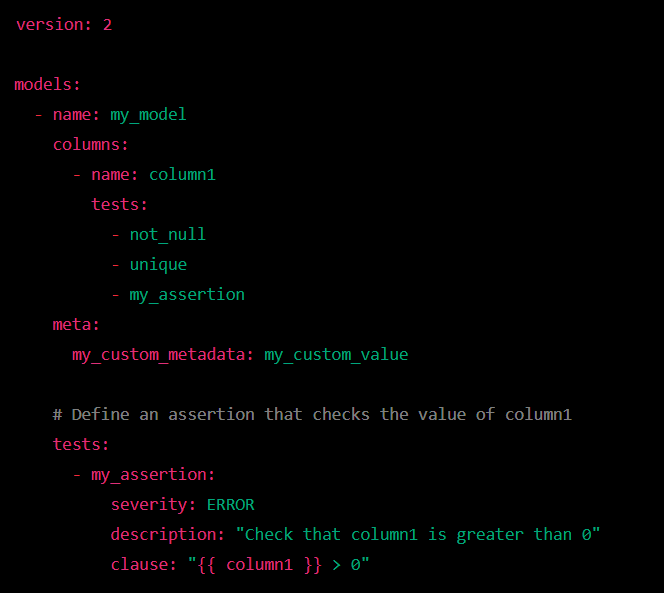

In this example, the `tests` key is used twice. The first use of `tests` is to define tests that will be run automatically by dbt when the model is built. These tests include checks for `not_null`, `unique`, and a custom assertion called `my_assertion`.

The second use of tests is to define the `my_assertion` assertion itself. This assertion checks that the `column1` value is greater than 0. The severity key specifies the `severity` of the assertion failure (in this case, an error). The `description` key provides a human-readable description of the assertion, and the `clause` key specifies the SQL code that should be executed to perform the assertion check.


## <font color='green'>Documentation</font>

Documentation in dbt is an important feature that allows data analysts, engineers, and other stakeholders to understand the purpose and context of dbt models, tests, and macros. Good documentation can help improve data literacy and reduce time spent on debugging and data discovery.

In dbt, documentation can be added to models, tests, macros, and columns using YAML comments in the associated SQL files or by using the `description` attribute in the `schema.yml` file. The description attribute can be used to provide more detailed documentation for each model, test, macro, or column.

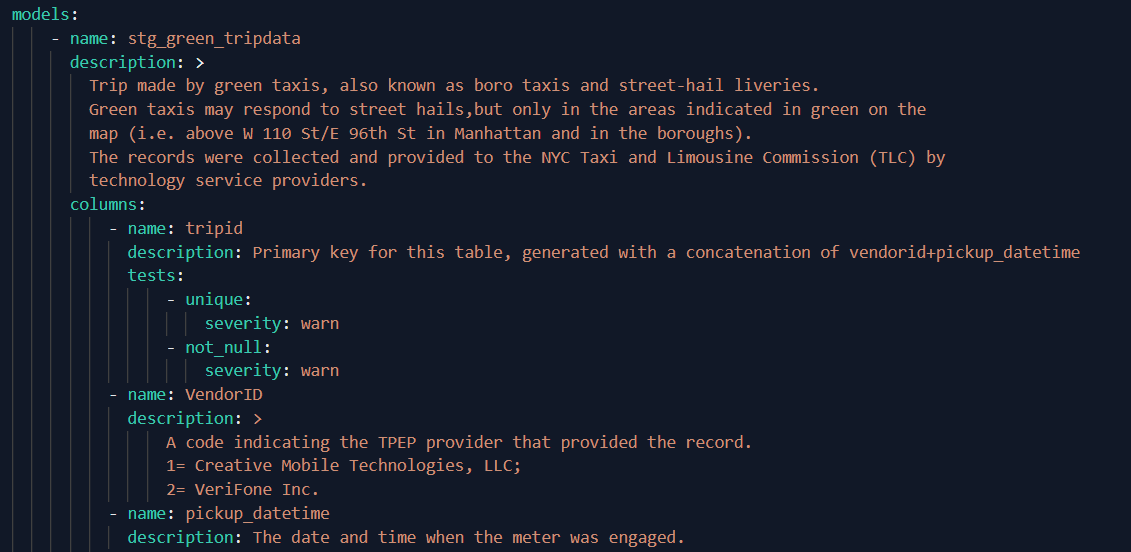

Additionally, dbt provides a built-in `docs` command that can be used to generate HTML documentation for all of the models, tests, and macros in a dbt project. 

The command used to generate documentation in dbt is `dbt docs generate`. After running this command, the documentation should be generated and stored in the `target` directory of your dbt project. This command tells dbt to compile relevant information about your dbt project and warehouse into `manifest.json` and `catalog.json` files respectively. To see documentation for all columns and not just columns described in your project, ensure that you have created the models with `dbt run` beforehand. The next step would be to serve the documentation so that it can be viewed in a browser. To do this, you can run the command `dbt docs serve`. This will start a local web server that serves the generated documentation. You can then view the documentation in your web browser by navigating to the URL provided by the `dbt docs serve` command.

<b>NOTE:</b>

`dbt docs serve` spins up a local web server that serves the documentation generated by `dbt docs generate`. This is designed to be used on a local machine, and not on a remote server like dbt cloud. If you are working on dbt cloud, just view the json in an online json viewer. See the below image for example which shows the `catalog.json` that was generated in the target folder after running `dbt docs generate`.

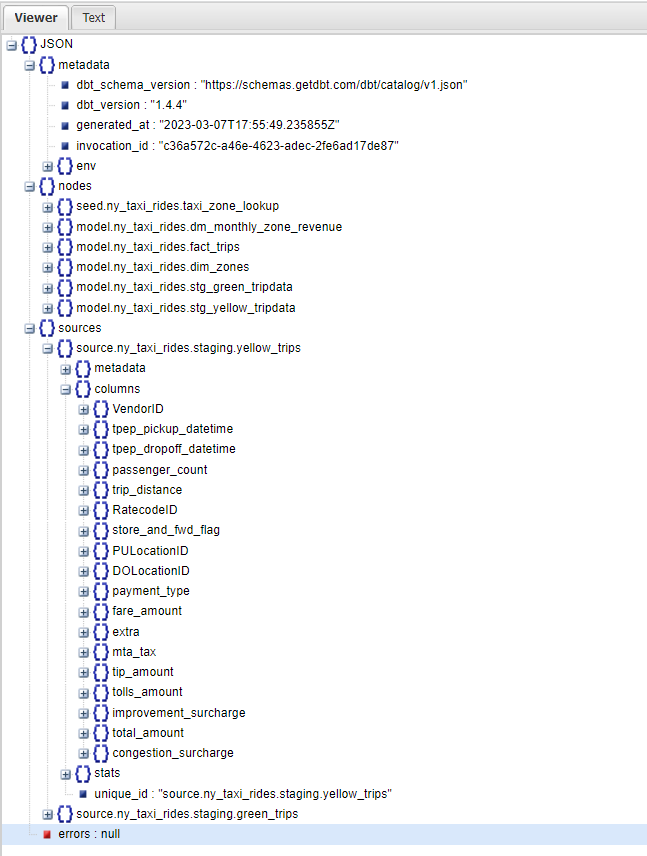

The dbt generated docs will include the following:

Information about the project:
- Model code (both from the .sql files and compiled code)
- Model dependencies
- Sources
- Auto generated DAGs from the ref() and source() macros
- Descriptions from the .yml files and tests

Information about the Data Warehouse (information_schema):
- Column names and data types
- Table stats like size and rows

To share the generated documentation with others, you can upload the contents of the `target` directory to a web server or other file-sharing service. This will allow others to view the documentation in their web browser by navigating to the appropriate URL.

Overall, good documentation is essential for maintaining a healthy and sustainable data infrastructure. In dbt, documentation can be added easily and efficiently, allowing for clear communication and collaboration among data teams and stakeholders.

# <font color='green'><a id='the_destination_7'>7) Deployment of a dbt project</a></font>


## <font color='green'>Deployment basics</font>

Deployment is the process of running the models we created in our development environment in a production environment. Separating the development and production environments allows us to continue building and testing models without affecting the models in production.

Normally, a production environment will have a different schema in our Data Warehouse and ideally a different user.

The deployment workflow defines the steps used to create a model from scratch and bring it to production. Here's a deployment workflow example:

1) Develop in a user branch
2) Open a Pull Request (PR) to merge into the main branch
3) Merge the user branch to the main branch
4) Run the new models in the production environment using the main branch
5) Schedule the models

dbt projects are usually deployed in the form of jobs:

- A job is a collection of commands such as `build` or `test`. A job may contain one or more commands
- Jobs can be triggered manually or on schedule
- dbt Cloud has a scheduler which can run jobs for us, but other tools such as Airflow or cron can be used as well
- Each job will keep a log of the runs over time, and each run will keep the logs for each command
- A job may also be used to generate documentation, which may be viewed under the run information
- If the `dbt source freshness` command was run, the results can also be viewed at the end of a job


## <font color='green'>Continuous Integration (CI)</font>

As mentioned earlier, a good software engineering practice that dbt enables is Continuous Integration (CI) - the practice of regularly merging development branches into a central repository, after which automated builds and tests are run. The goal of CI is to reduce adding bugs to the production code and maintain a more stable project.

CI is built on jobs: a CI job will do things such as build, test, etc. We can define CI jobs which can then be triggered under certain circunstances to enable CI.

dbt makes use of GitHub/GitLab's Pull Requests to enable CI via webhooks. When a PR is ready to be merged, a webhook is received in dbt Cloud that will enqueue a new run of a CI job. This run will usually be against a temporary schema that has been created explicitly for the PR. If the job finishes successfully, the PR can be merged into the main branch, but if it fails the merge will not happen.

CI jobs can also be scheduled with the dbt Cloud scheduler, Airflow, cron and a number of additional tools.

## <font color='green'>Deployment using dbt Cloud</font>

In dbt Cloud, you might have noticed that after the first commit, the `main` branch becomes read-only and forces us to create a new branch if we want to keep developing. dbt Cloud does this to enforce us to open PRs for CI purposes rather than allowing merging to main straight away.

In order to properly establish a deployment workflow, we must define environments within dbt Cloud. In the sidebar, under Environments, you will see that a default Development environment is already generated, which is the one we've been using so far. (dbt_balaji_padmanathan)

We will create a new Production environment of type Deployment using the latest stable dbt version. By default, the environment will use the main branch of the repo but you may change it for more complex workflows. If you used the JSON credentials when setting up dbt Cloud then most of the deployment credentials should already be set up except for the dataset. For this example, we will use the `production` dataset (make sure that the `production` dataset/schema exists in your BigQuery project).

The dbt Cloud scheduler is available in the Jobs menu in the sidebar. We will create a new job with name `dbt build` using the Production environment, we will check the Generate docs? checkbox. Add the following commands:

- dbt seed
- dbt run
- dbt test

In the Schedule tab at the bottom we will check the Run on schedule? checkbox with a timing of Every day and every 6 hours. Save the job. You will be shown the job's run history screen which contains a Run now buttom that allows us to trigger the job manually; do so to check that the job runs successfully.

You can access the run and check the current state of it as well as the logs. After the run is finished, you will see a View Documentation button at the top; clicking on it will open a new browser window/tab with the generated docs.

Under Account settings > Projects, you may edit the project in order to modify the Documentation field under Artifacts; you should see a drop down menu which should contain the job we created which generates the docs. After saving the changes and reloading the dbt Cloud website, you should now have a Documentation section in the sidebar. 

Find below the implementation of the what we have discussed above.


## <font color='green'>Implementation</font>

Create the Production environment in dbt cloud. Since `production` is the name of the schema we defined in bigquery, I have entered the same name here.

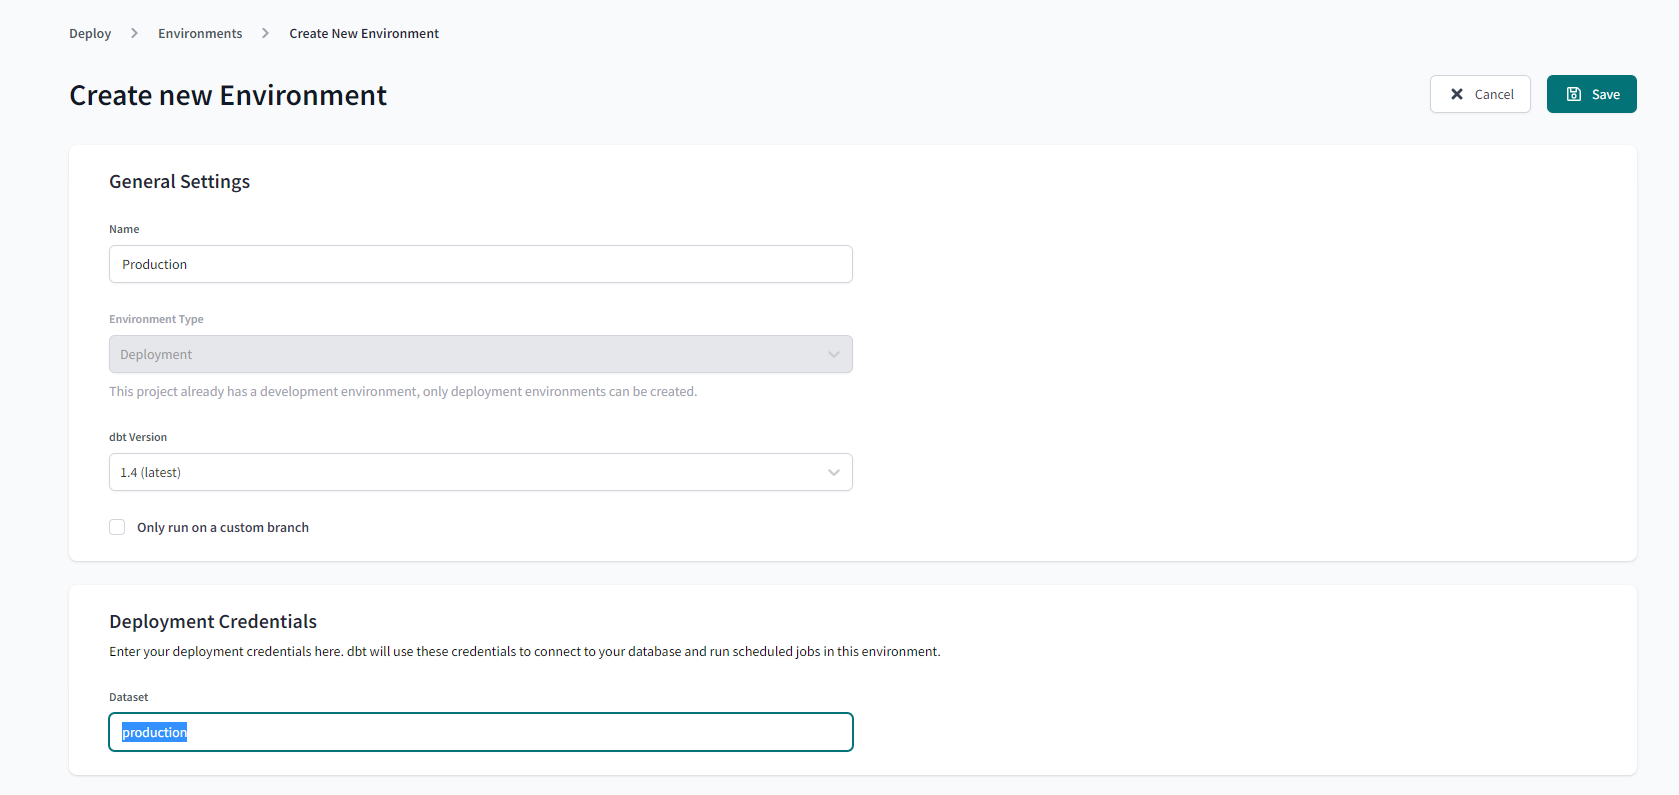

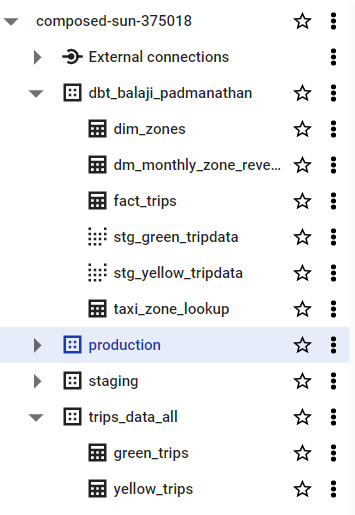


This is how it looks like after its creation (image below). Please note that all of our models which we ran till now was done in the Development environment whose credentials were entered at the start (can be found in the profile page. dbt_balaji_padmanathan in my case)

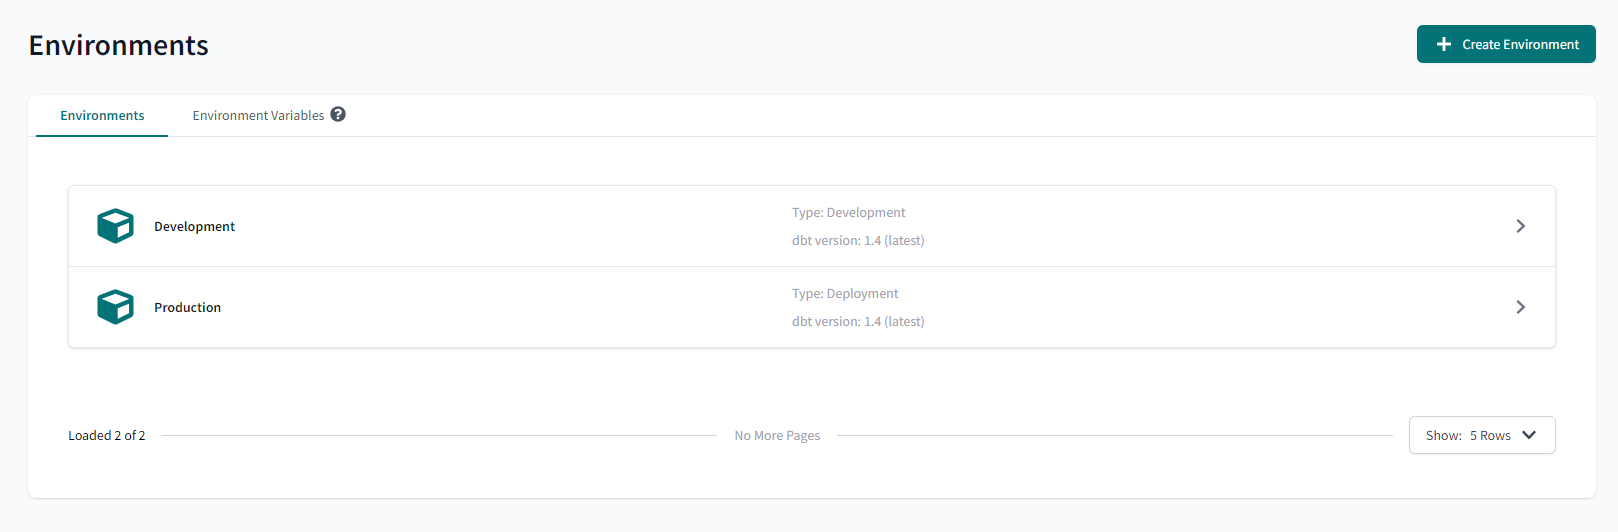

Once the environment is created, the next step is to create a job. See the below image for example:

Pick the appropriate filters as mentioned in the previous section and create a new job. 

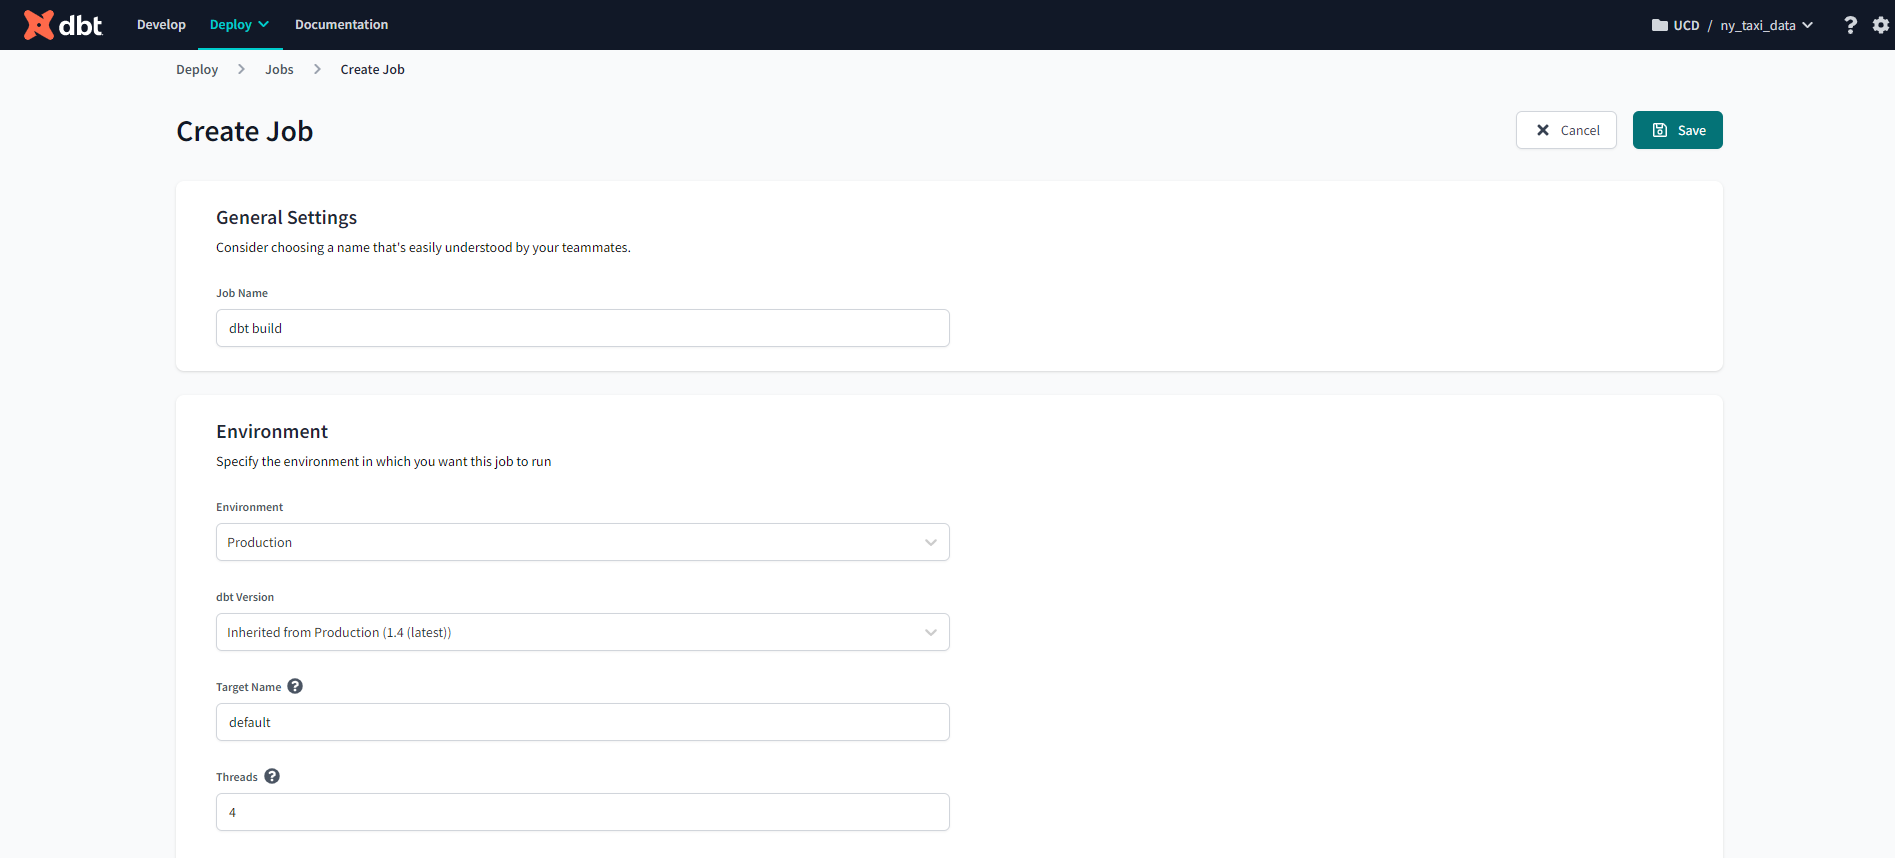

Then run the job. Make sure the user branch is merged with the main branch before running the job.

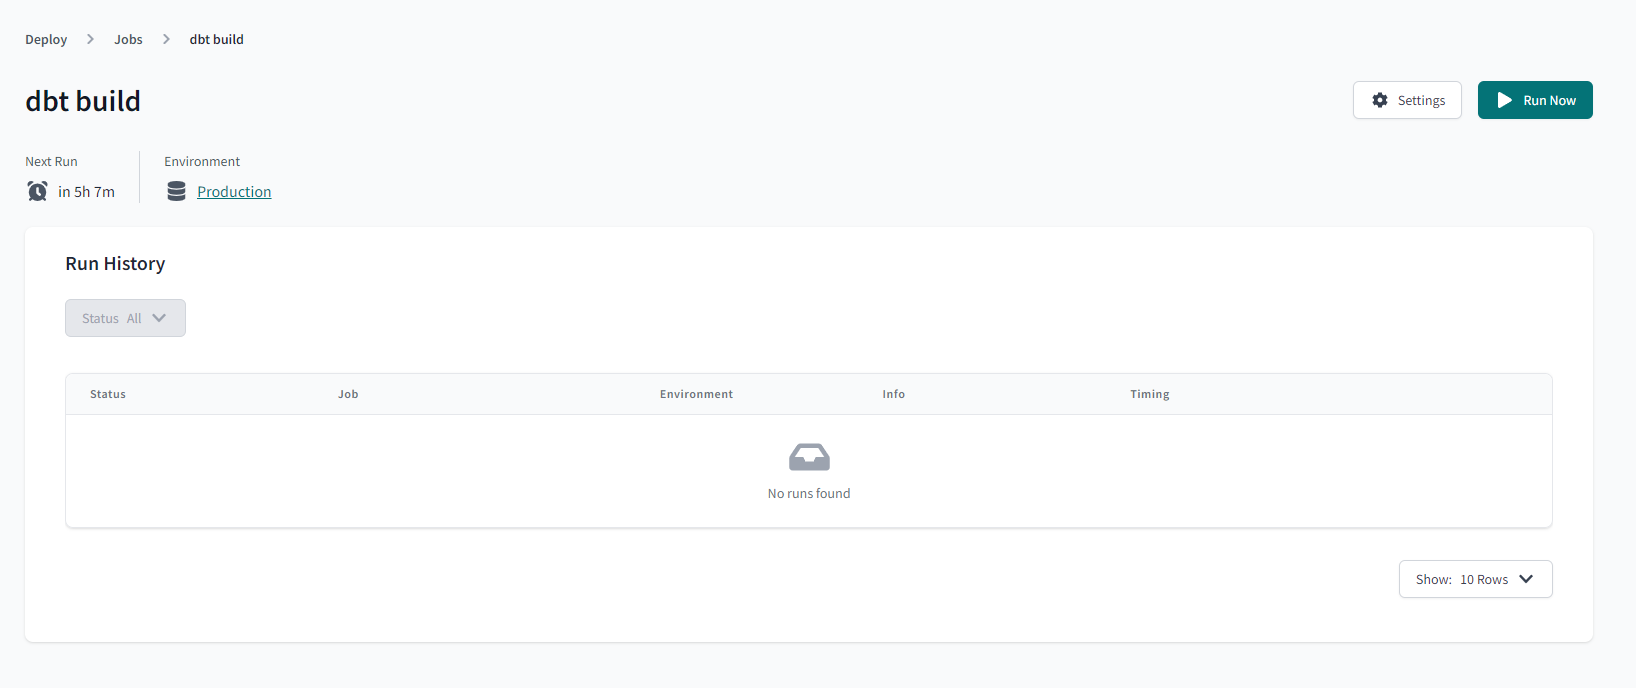

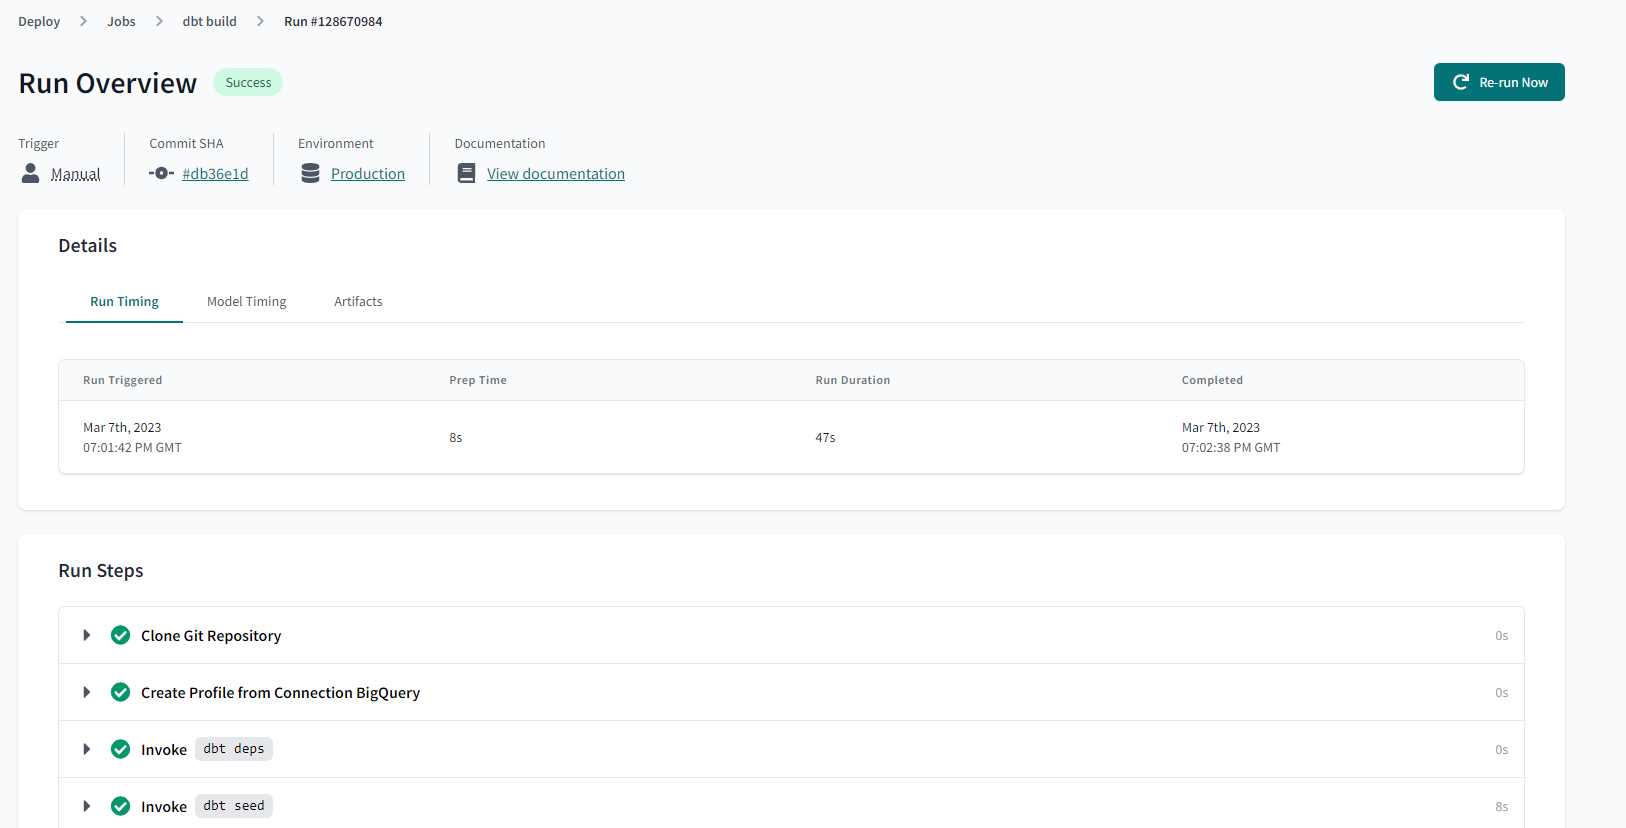

You can check the logs inside each command in the job. 

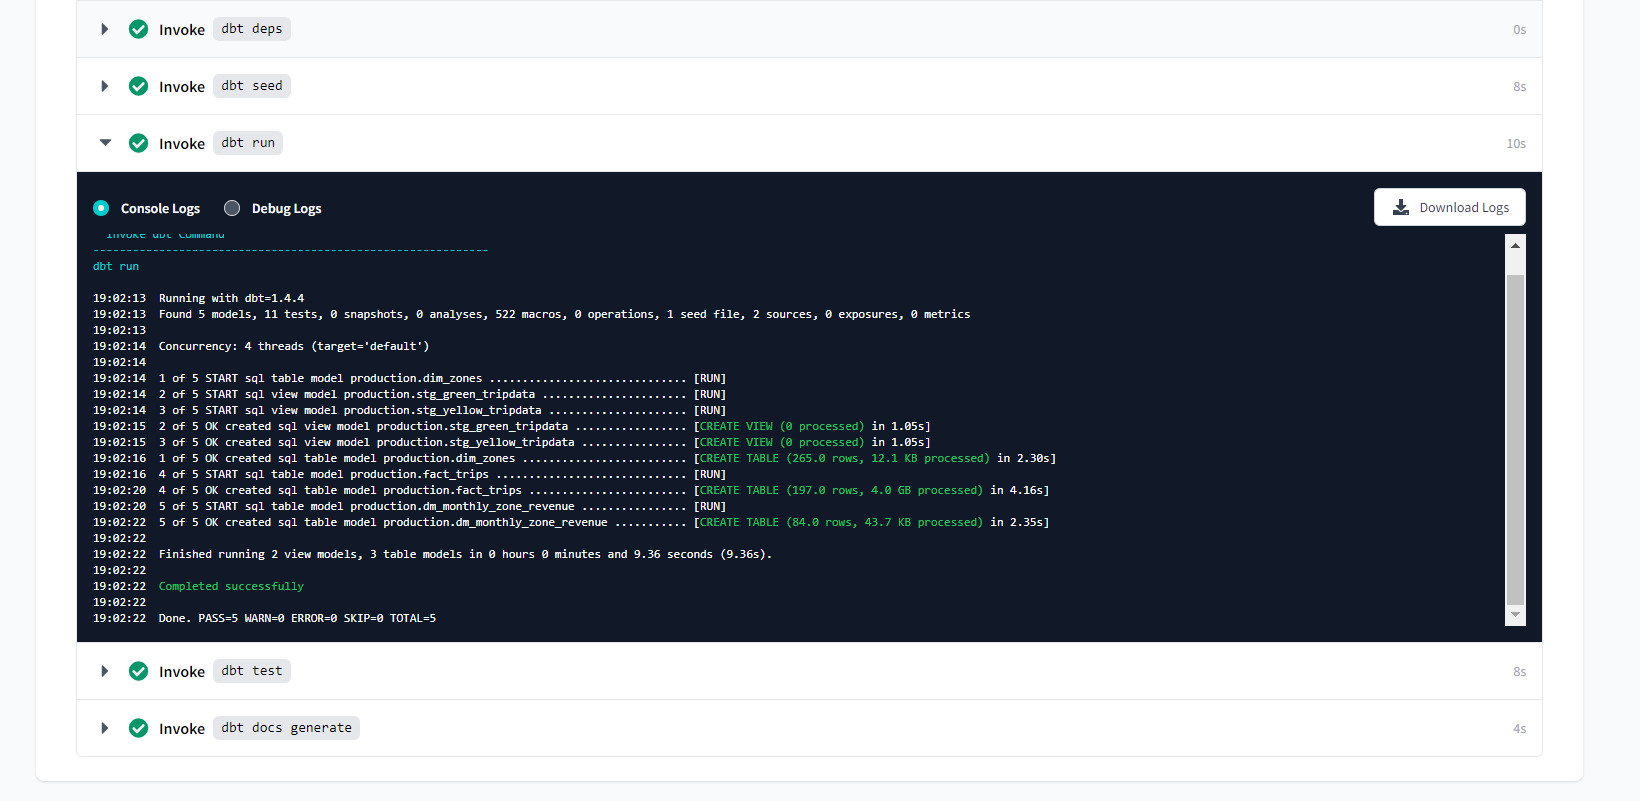

Once the job is run, you can check BigQuery to see if the tables and views are present in the `production` schema:

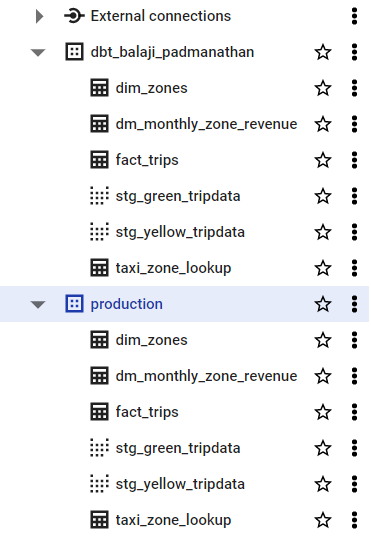

You can select the `View documentation` option to view the documentation for the job

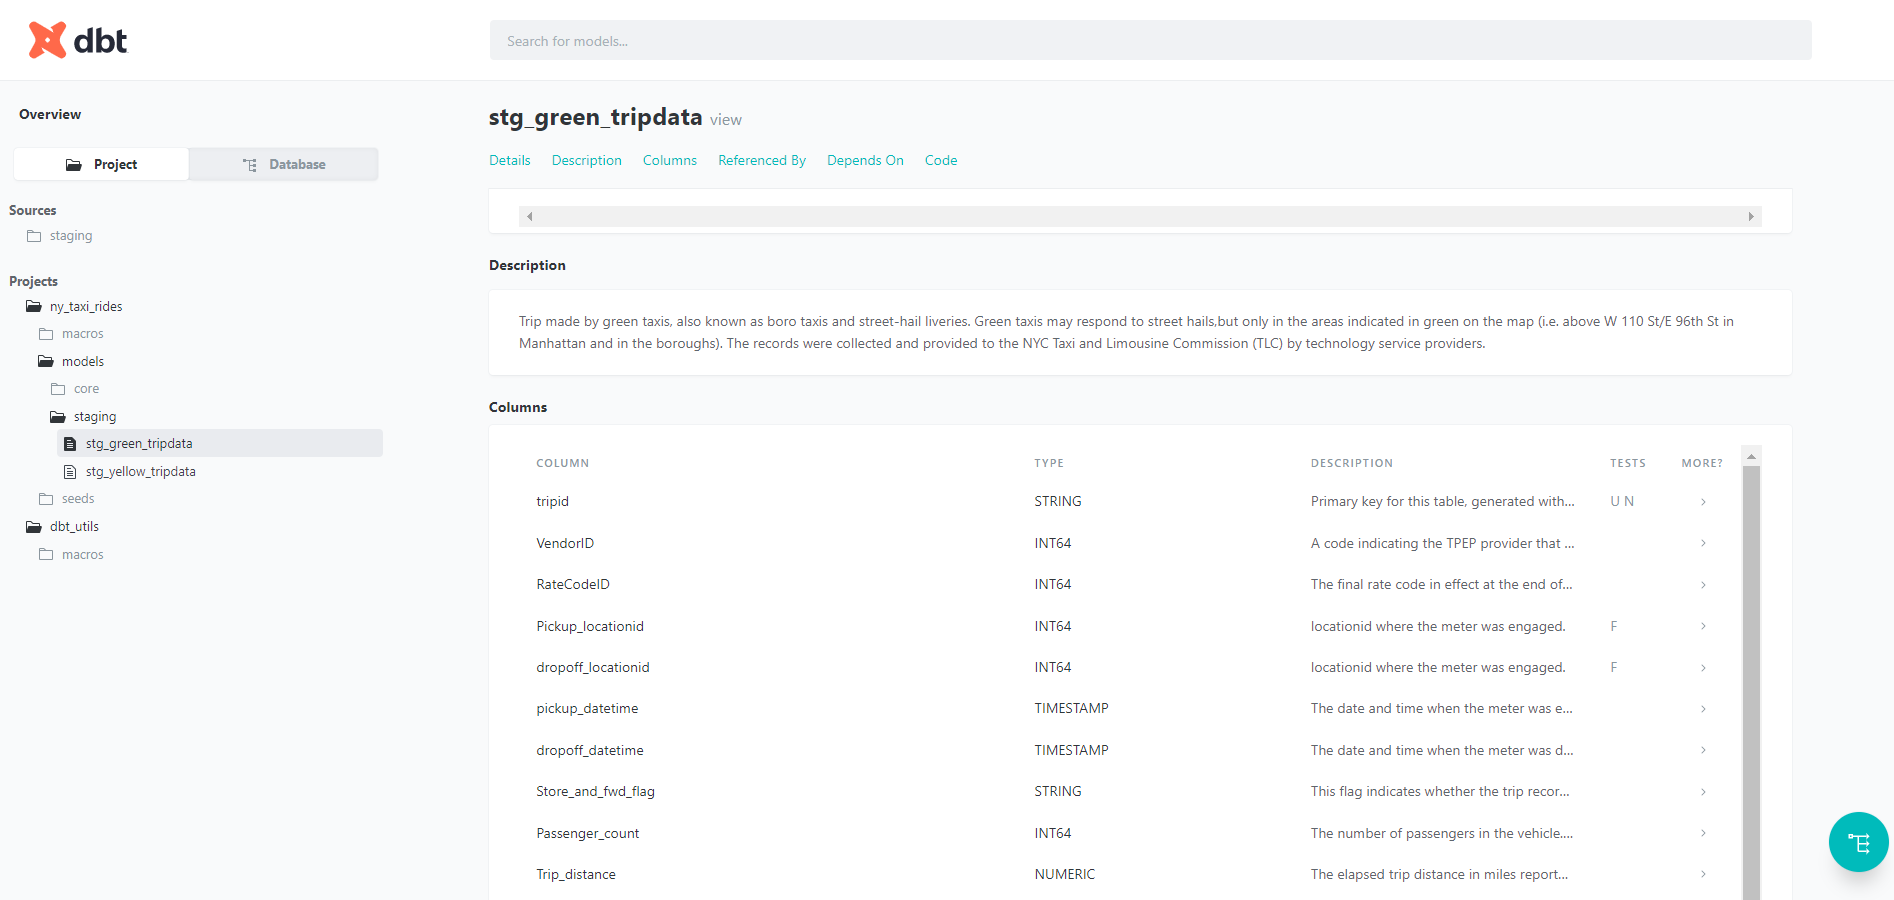


# <font color='green'><a id='the_destination_8'>8) Data Visualization</a></font>

Follow the video as it's self-explanatory -

https://www.youtube.com/watch?v=39nLTs74A3E&list=PL3MmuxUbc_hJed7dXYoJw8DoCuVHhGEQb&index=39

# <font color='green'><a id='the_destination_9'>9) References</a></font>

https://aws.amazon.com/what-is/data-modeling/  \
https://github.com/ziritrion/dataeng-zoomcamp/blob/main/notes/4_analytics.md \
https://docs.google.com/presentation/d/1xSll_jv0T8JF4rYZvLHfkJXYqUjPtThA/edit#slide=id.g1112932a308_0_193 
